# Final Team Project - Group 14

- **Name:** Ravi Teja Kothuru
- **Course Code:** AAI-510-IN2
- **Course Name:** Machine learning: Fundamentals and Applications
- University of San Diego
- **Instructor:** Dr. Raj Kumar Garg
- **Date:** 23rd June 2025



# Project Details

- **Title of the Project:** Unspoken Signals: Voice-Based AI to Decode Emotions

- **Description and Objectives of the Project:**

  - Thoughts and feelings are shared between humans not only through verbal language but also through the nuanced variations of human vocalization - variations in emphasis (tone), loudness (energy), pitch, and timing (rhythm) - signals that machines are often not adept at interpreting. While machines have become remarkably more intelligent, our capabilities for perceiving and interpreting the emotional aspects of spoken human language remain far behind technology. This is highly relevant when developing empathetic AI systems that consider the emotional aspect of human affect, such as monitoring mental health, dealing with customers, or human-computer interaction.
  
  - ***Unspoken Signals*** will tackle this issue using an AI driven application that can decode vocal signals and provide an interpretation of just about any emotional type. The project will utilize RAVDESS Emotional Speech Audio dataset and continue to explore how dimensions of emotional expression correlate with various acoustic features - with the hope to build some models that will be able to discover not just the emotional expression, but also the acoustic representations of emotions through voiced and vocalized language. It is not only about establishing classification categories for emotions like happiness, sadness, anger, fear, etc, but making the implicit meaning of how acoustic features can translate to emotional meaning, therefore getting machines one step further to developing some form of intuitive emotional intelligence.

- **Goal of the Project:**
  - ***Unspoken Signals*** is a project to teach machines to learn the emotional richness, expressed through speech, in the way we interpret, without thought of joy, sadness, anger, and a kingdom of others in another person's tone. While many speech/emotion systems simply classify furthermore understand emotion in speech, we aim to analyze the voice to find the elements of the voice, such as pitch, pace, energy, and rhythm, to understand the emotional pattern. We want to look beyond the classification of emotion and towards why the specific characteristics of the voice create specific emotional responses.

  - ***Unspoken Signals*** will create a flow between sound and sentiment, in the way that we flow as humans to interpret facial signals to vocal signals everyday. This initiative aims to bring machines to an intuition of the richness or depths of emotion's impact to comprehend the intangibility of emotion from sound, vocals alone.

# Dataset Details

- **Name of the Dataset:** RAVDESS Emotional Speech Audio
- **Description of the dataset:** Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS.

- Full dataset of speech and song, audio and video (24.8 GB) available from Zenodo. Construction and perceptual validation of the RAVDESS is described in our Open Access paper in PLoS ONE.
	- Zenodo Reference: https://zenodo.org/records/1188976
	- PLoS ONE Reference: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196391

- **Dataset Files:** This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

- **File naming conventions:** Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-02-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- **Filename identifiers:**

  - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
  - Vocal channel (01 = speech, 02 = song).
  - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
  - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
  - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
  - Repetition (01 = 1st repetition, 02 = 2nd repetition).
  - Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


- **Filename example:** 03-02-06-01-02-01-12.wav

  - Audio-only (03)
  - Song (02)
  - Fearful (06)
  - Normal intensity (01)
  - Statement "dogs" (02)
  - 1st Repetition (01)
  - 12th Actor (12)
  - Female, as the actor ID number is even.

# Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extract Audio Dataset

In [ ]:
!unzip '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-510-IN2_Machine learning - Fundamentals and Applications/AAI-510-IN2_Final Project/AAI-510-IN2_Dataset/RAVDESS_Emotional_Speech_Audio_Dataset.zip' -d '/content/extracted_speech_audio_dataset'

Archive:  /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-510-IN2_Machine learning - Fundamentals and Applications/AAI-510-IN2_Final Project/AAI-510-IN2_Dataset/RAVDESS_Emotional_Speech_Audio_Dataset.zip
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/extracted_speech_audio_dataset/Actor_01/03-01-02-02-

# Install and Import all the libraries

In [ ]:
# Install "pyloudnorm" library (the audio's loudness and peak normalization library)
!pip install pyloudnorm

In [ ]:
!pip install xgboost

In [ ]:
import os
import gc
import math
import itertools
import json
import time
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import pyloudnorm as pyln
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchaudio
import torchaudio.transforms as T

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation, BatchNormalization

# EDA and Audio Data Preprocessing

### 1. Set Base Directory
- We will set the root directory, which is the dataset (which contains the `.wav` files) extracted in this location.

---

### 2. Create Lists
- `file_emotion`: saves numeric emotion codes extracted from the file naming.
- `file_path`: saves full file paths of the `.wav` files

---

### 3. Create File Traversal Function
- We will create a helper function called `capture_audio_file_paths()` to traverse the directory.
- For each `.wav` file when traversing:
  - It will extract the metadata (emotion code) from the name of the file.
  - It will save the emotion code and full path to respective lists.
  - It will just skip any malformed filenames.

---

### 4. Capture Files from Dataset Folders
- We will call the helper function on:
  - A subdirectory with all of the actor folders.
  - The base directory itself (ceasing it has `.wav` files directly under it).

---

### 5. Create and Combine into a DataFrame
- We will convert those lists (`file_emotion` and `file_path`) to Pandas DataFrames. Then, we will concatenate them into a table (`data`) a column for:
  - `Emotions`
  - `Path`.

---

### 6. Map Numeric Emotion Codes to Labels
- We will use a dictionary (`emotion_map`) to map:

| Emotion Code | Emotion Label |
|--------------|----------------|
| 1            | neutral        |
| 2            | calm           |
| 3            | happy          |
| 4            | sad            |
| 5            | angry          |
| 6            | fear           |
| 7            | disgust        |
| 8            | surprise       |

- Then update the emotion column with the values from the dictionary above.

---

### 7. Save to CSV
- We will create a new directory called `EmotionData`.
- We will save the DataFrame object to `emotion_audio_dataset.csv` and it allows us to get back to later.

---

### 8. Plot Emotion Distribution
- We will set the Seaborn style/theme.
- We will plot a count bar chart of how many samples there are of each emotion.
- We will save it as `emotions_plot.png`.

---
### 9. Build Spectrograms
- Create `create_and_save_spectrogram()`:
  - Load the audio with `librosa`.
  - Create a spectrogram image from it.
  - Save it to a subdirectory based on the emotion.

---
### 10. Spectrogram Batch Processing
- Create `process_in_batches()`:
  - Break the dataset into chunks (or batches).
  - Create spectrograms for all the chunks/batches.
  - Use garbage collection to manage memory.

---
### 11. Subset for Feature Extraction
- Sample a fixed amount (1500 for example) files randomly.
- Work with the smaller dataset and calculate additional features.

---
### 12. Audio Features
- For each file in the sample:
- **Duration**: Total time in seconds.
- **Pitch**: Mean pitch value with pitch tracking.
- **Energy**: Mean signal energy (volume).
- **ZCR (Zero-Crossing Rate)**: Rate of change of the amplitude.

Put all the values into lists and add to the sampleDataFrame.

Let us understand the basic meaning of each Audio feature here:

| Feature     | Description                                                                                                   | Purpose in Emotion Analysis                                                                 |
|-------------|---------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| Duration    | The entirety of the audio recording length in seconds.                                                                | Some emotions (like *calm* or *sad*) may emerge when expressed in longer or slower speech.       |
| Pitch       | Perceived audio signal frequency, often in Hertz (Hz).                                    | High frequency may show an emotion like *surprise or happy* and lower frequency signals of *sadness*. |
| Energy      | Average signal power over time (mean of these squared amplitude values).                   | High energy is typical for example with *angry* or *happy* speech. Low or medium energy is likely for example with *sad* or *neutral* speech. |
| ZCR (Zero Crossing Rate) | The number of times the audio signal changes sign (crosses the zero line) over time.                    | Higher zero crossing rate might represent noise yet also excited speech (like *surprise*, or *angry*). Overall lower rates reflect less noise and calm or monotone speech. |
| Spectrogram | A visual representation of the frequency content of the audio signal of the recording over time.  A color intensity representing amplitude. | Spectrograms provide the input that allow deep learning models (i.e. CNNs) to learn patterns around the vocal frequency content representative of emotion. |
| MFCC (Mel-Frequency Cepstral Coefficients) | A compact representation of the short-term power spectrum of a sound, modelled on human hearing (mel scale). | Captures *timbre* and *tone* variations in speech; commonly used for speech and emotion recognition in ML models. |

---

### 13. Visualize Audio Feature as Emotion
- Build the following visualization:
- **Boxplot**: Duration
- **Violin Plot**: Pitch, energy
- **Boxplot**: ZCR
- Use respective color palettes per emotion.

---
### 14. Clean up Emotion Label
- Check that all entry in `Emotions` are strings (not arrays/ lists).
- Use a cleaning function on that column.

### 15. Extract the MFCC Features
- Define the `extract_mfcc()` method that will extract 13 MFCCs per audio file.
- Average the MFCCs over time so we can reduce the dimensionality.
- Save the MFCCs in a list as feature vectors.

---

### 16. Combine All the Features
- Create a DataFrame from the MFCC feature list.
- Merge it with the original sample's (Pitch, Energy, ZCR, Duration, and Emotions).
- Final output: A complete feature set ready to use for machine learning.

In [ ]:
# Base directory where files are extracted
base_dir = "/content/extracted_speech_audio_dataset"

In [ ]:
file_emotion = []
file_path = []

# Helper function to process all .wav files in a given directory tree
def capture_audio_file_paths(file_base_path):
    for root, dirs, files in os.walk(file_base_path):
        for file in files:
            if file.endswith('.wav'):
                parts = file.split('.')[0].split('-')
                if len(parts) >= 3:
                    try:
                        emotion_code = int(parts[2])
                        file_emotion.append(emotion_code)
                        file_path.append(os.path.join(root, file))
                    except ValueError:
                        continue  # skip non-standard filenames

In [ ]:
# Parse both locations
capture_audio_file_paths(os.path.join(base_dir, "audio_speech_actors_01-24"))
capture_audio_file_paths(base_dir)  # this includes Actor_01 to Actor_24 directly under /content/extracted_speech_audio_dataset

# Create a dataframe
emotion = pd.DataFrame(file_emotion, columns=['Emotions'])
path = pd.DataFrame(file_path, columns=['Path'])
data = pd.concat([emotion, path], axis=1)

# Emotion label mapping
emotion_map = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}

data['Emotions'] = data['Emotions'].map(emotion_map)

In [ ]:
# Save to CSV
emotion_data = "/content/EmotionData"
os.makedirs(emotion_data, exist_ok=True)
data.to_csv(os.path.join(emotion_data, "emotion_audio_dataset.csv"), index=False)

In [ ]:
# View the CSV
data.head(25)

Emotions                                               Path
0        sad  /content/extracted_speech_audio_dataset/audio_...
1      angry  /content/extracted_speech_audio_dataset/audio_...
2        sad  /content/extracted_speech_audio_dataset/audio_...
3        sad  /content/extracted_speech_audio_dataset/audio_...
4      happy  /content/extracted_speech_audio_dataset/audio_...
5    disgust  /content/extracted_speech_audio_dataset/audio_...
6       calm  /content/extracted_speech_audio_dataset/audio_...
7      happy  /content/extracted_speech_audio_dataset/audio_...
8      happy  /content/extracted_speech_audio_dataset/audio_...
9      happy  /content/extracted_speech_audio_dataset/audio_...
10      calm  /content/extracted_speech_audio_dataset/audio_...
11      fear  /content/extracted_speech_audio_dataset/audio_...
12   disgust  /content/extracted_speech_audio_dataset/audio_...
13       sad  /content/extracted_speech_audio_dataset/audio_...
14     angry  /content/extracted_speech_audio_dataset/audio_...
15      fear  /content/extracted_speech_audio_dataset/audio_...
16      fear  /content/extracted_speech_audio_dataset/audio_...
17     angry  /content/extracted_speech_audio_dataset/audio_...
18     angry  /content/extracted_speech_audio_dataset/audio_...
19      calm  /content/extracted_speech_audio_dataset/audio_...
20   disgust  /content/extracted_speech_audio_dataset/audio_...
21   disgust  /content/extracted_speech_audio_dataset/audio_...
22  surprise  /content/extracted_speech_audio_dataset/audio_...
23   neutral  /content/extracted_speech_audio_dataset/audio_...
24     happy  /content/extracted_speech_audio_dataset/audio_...

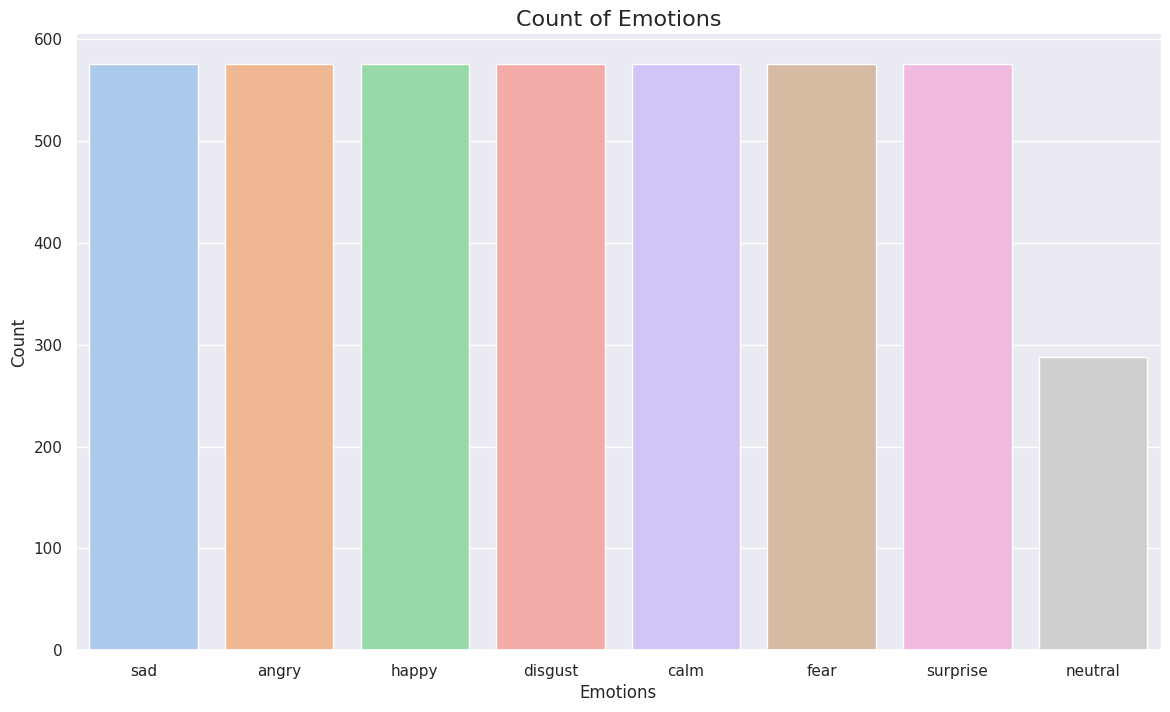

In [ ]:
# Set the Seaborn theme
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='mako',
    font='sans-serif',
    font_scale=1,
    color_codes=True
)

# Create a figure
plt.figure(figsize=(14, 8))

# Plot the count of each emotion
sns.countplot(
    x='Emotions',
    data=data,
    order=data['Emotions'].value_counts().index,
    palette='pastel'
)

# Set plot labels and title
plt.title('Count of Emotions', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Remove top and right spines
sns.despine(top=True, right=True)

# Save the plot to the same EmotionData directory
plt.savefig(os.path.join(emotion_data, "emotions_plot.png"))

# Show the plot
plt.show()

In [ ]:
def create_and_save_spectrogram(file_path, emotion_label, save_root):
    try:
        y, sr = librosa.load(file_path, duration=5.0)
        X = librosa.stft(y)
        Xdb = librosa.amplitude_to_db(abs(X))

        emotion_dir = os.path.join(save_root, emotion_label)
        os.makedirs(emotion_dir, exist_ok=True)

        base_name = os.path.basename(file_path).replace('.wav', '.png')
        save_path = os.path.join(emotion_dir, base_name)

        plt.figure(figsize=(10, 3))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"{emotion_label}", fontsize=10)
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()

    except Exception as e:
        print(f"Failed creating spectogram for {file_path}: {e}")

In [ ]:
def process_in_batches(data, batch_size=100):
    total = len(data)
    for start in range(0, total, batch_size):
        end = min(start + batch_size, total)
        batch = data.iloc[start:end]
        print(f"Processing batch: {start}-{end}")
        for idx, row in tqdm(batch.iterrows(), total=len(batch), desc=f"Batch {start//batch_size + 1}"):
            create_and_save_spectrogram(row['Path'], row['Emotions'], spectrogram_root)
        gc.collect()

In [ ]:
# Directory to save spectrograms
spectrogram_root = os.path.join(emotion_data, "spectrograms")

# Call the function to process
process_in_batches(data, batch_size=100)

Processing batch: 0-100


Batch 1: 100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


Processing batch: 100-200


Batch 2: 100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


Processing batch: 200-300


Batch 3: 100%|██████████| 100/100 [00:50<00:00,  2.00it/s]


Processing batch: 300-400


Batch 4: 100%|██████████| 100/100 [00:47<00:00,  2.11it/s]


Processing batch: 400-500


Batch 5: 100%|██████████| 100/100 [00:48<00:00,  2.04it/s]


Processing batch: 500-600


Batch 6: 100%|██████████| 100/100 [00:45<00:00,  2.18it/s]


Processing batch: 600-700


Batch 7: 100%|██████████| 100/100 [00:48<00:00,  2.06it/s]


Processing batch: 700-800


Batch 8: 100%|██████████| 100/100 [00:48<00:00,  2.08it/s]


Processing batch: 800-900


Batch 9: 100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


Processing batch: 900-1000


Batch 10: 100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


Processing batch: 1000-1100


Batch 11:  37%|███▋      | 37/100 [00:18<00:26,  2.37it/s]

In [ ]:
# Take a random sample (e.g., 1500 files)
sample_audio_data = data.sample(n=1500, random_state=42).copy()

# Initialize lists
audio_durations = []
audio_pitches = []
audio_energies = []
audio_zcr = []

for path in sample_audio_data['Path']:
    y, sr = librosa.load(path, sr=None)
    pitches_, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = pitches_[magnitudes > np.median(magnitudes)].mean()
    energy = np.mean(y**2)
    duration = librosa.get_duration(y=y, sr=sr)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))

    audio_pitches.append(pitch)
    audio_energies.append(energy)
    audio_durations.append(duration)
    audio_zcr.append(zcr)


# Add columns to DataFrame
sample_audio_data['Duration'] = audio_durations
sample_audio_data['Pitch'] = audio_pitches
sample_audio_data['Energy'] = audio_energies
sample_audio_data['ZCR'] = audio_zcr

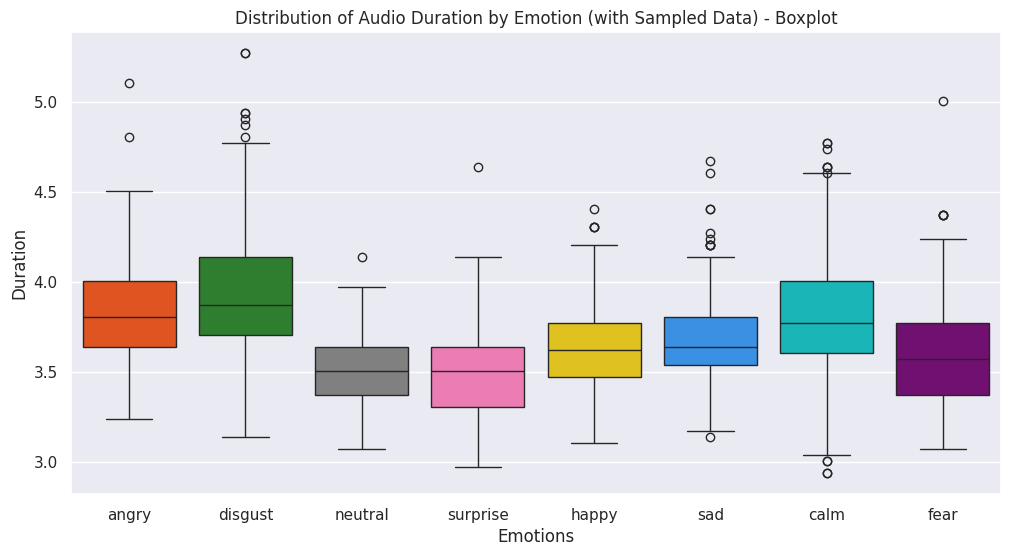

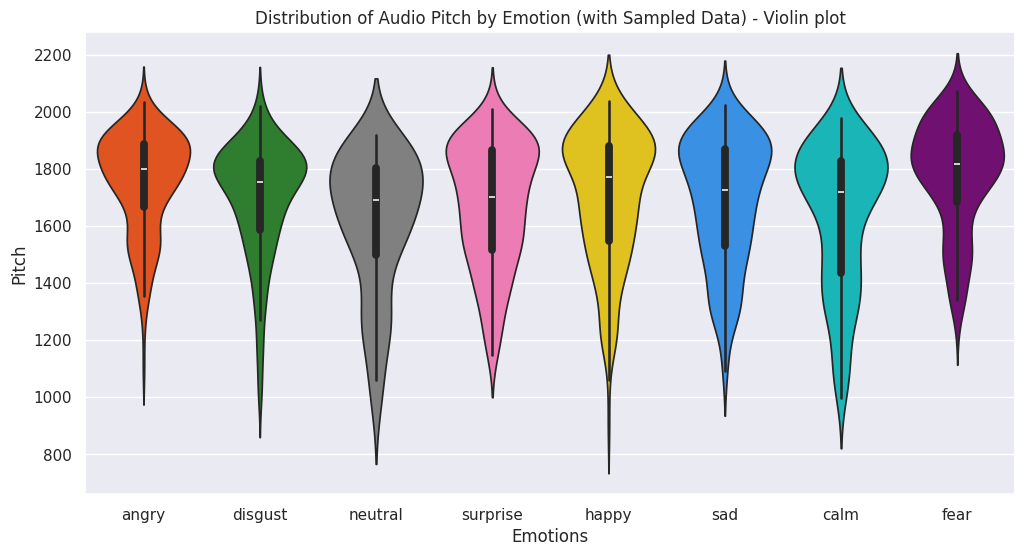

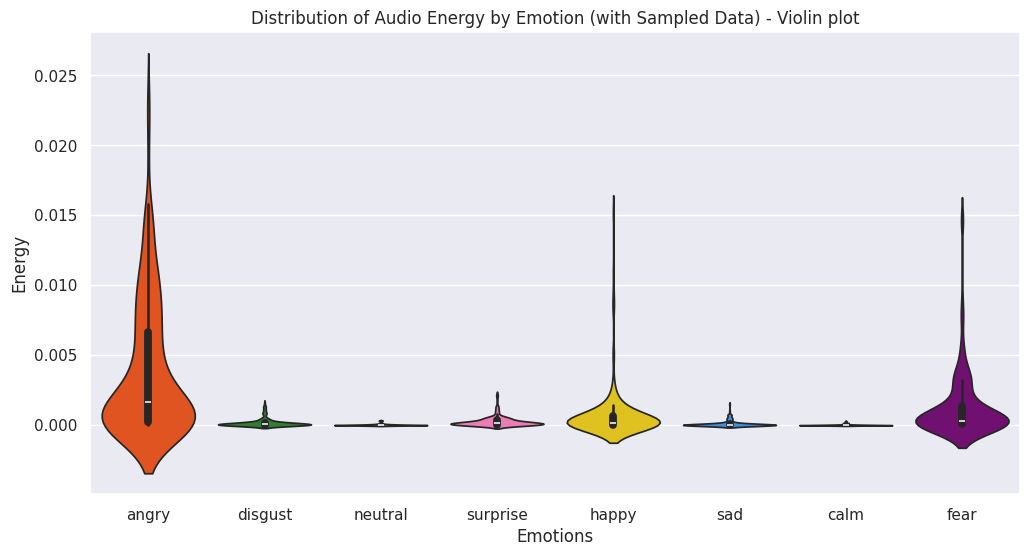

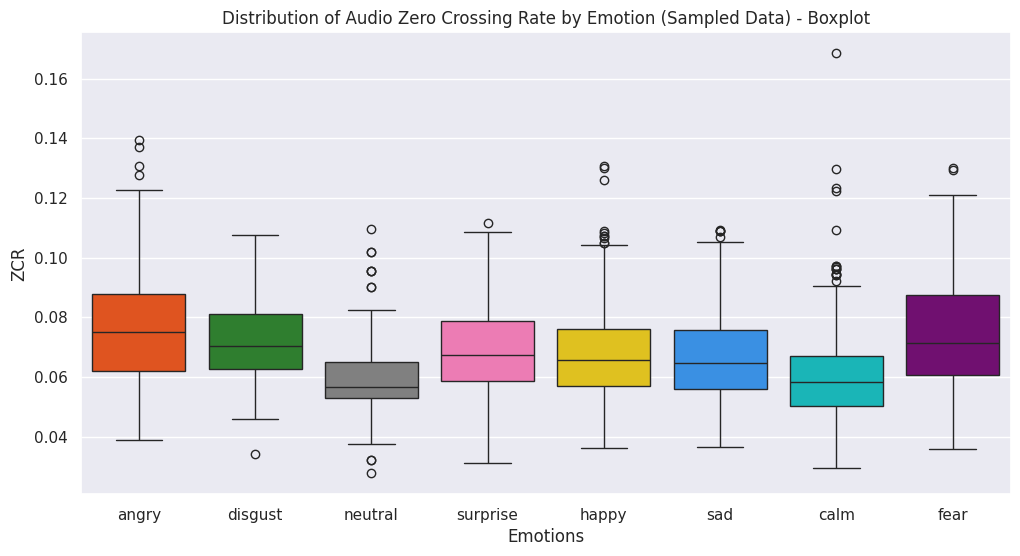

In [ ]:
custom_palette = {
    "happy": "#FFD700",    # gold
    "sad": "#1E90FF",      # dodger blue
    "angry": "#FF4500",    # orange red
    "neutral": "#808080",  # gray
    "calm": "#00CED1",     # dark turquoise
    "fear": "#800080",     # purple
    "disgust": "#228B22",  # forest green
    "surprise": "#FF69B4"  # hot pink
}

# Duration - Boxplot with custom colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Emotions', y='Duration', data=sample_audio_data, palette=custom_palette)
plt.title("Distribution of Audio Duration by Emotion (with Sampled Data) - Boxplot")
plt.show()
print("\n\n")

# Pitch - Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Emotions', y='Pitch', data=sample_audio_data, palette=custom_palette)
plt.title("Distribution of Audio Pitch by Emotion (with Sampled Data) - Violin plot")
plt.show()
print("\n\n")

# Energy - Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Emotions', y='Energy', data=sample_audio_data, palette=custom_palette)
plt.title("Distribution of Audio Energy by Emotion (with Sampled Data) - Violin plot")
plt.show()

# ZCR - Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Emotions', y='ZCR', data=sample_audio_data, palette=custom_palette)
plt.title("Distribution of Audio Zero Crossing Rate by Emotion (Sampled Data) - Boxplot")
plt.show()

In [ ]:
# Ensure each emotion is a string (fix nested arrays or wrong types)
def clean_emotion(value):
    # If it's a numpy array or list like ['happy'], take the first element
    if isinstance(value, (np.ndarray, list)):
        return str(value[0])
    return str(value)

In [ ]:
# Apply the cleaning function
sample_audio_data['Emotions'] = sample_audio_data['Emotions'].apply(clean_emotion)

In [ ]:
sample_audio_data['Emotions'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [ ]:
sample_audio_data['Emotions'].unique()

array(['angry', 'disgust', 'neutral', 'surprise', 'happy', 'sad', 'calm',
       'fear'], dtype=object)

In [ ]:
# Extract MFCCs (e.g., 13 coefficients) and average over time axis
def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs, axis=1)  # Take mean over time
        return mfccs_mean
    except Exception as e:
        print(f"Error extracting MFCCs from {file_path}: {e}")
        return np.zeros(n_mfcc)

In [ ]:
# Extract MFCCs for all files and stack them
mfcc_features = []

for path in sample_audio_data['Path']:
    mfcc = extract_mfcc(path)
    mfcc_features.append(mfcc)

# Convert to DataFrame with reset index to align with sample_audio_data
mfcc_df = pd.DataFrame(mfcc_features, columns=[f'MFCC_{i+1}' for i in range(13)])
mfcc_df.reset_index(drop=True, inplace=True)
sample_audio_data.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate all indices are aligned (0–249)
features = pd.concat([
    mfcc_df,
    sample_audio_data[['Pitch', 'Energy', 'ZCR', 'Duration', 'Emotions']]
], axis=1)

In [ ]:
features.head(50)

MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0  -530.949768  56.710712 -17.588903   3.702265  -7.364575  -5.028224   
1  -688.991760  52.997437  -0.694921  10.821215  -1.606246  12.015389   
2  -707.477356  64.675331   1.403847  12.914077  -5.154926  14.195786   
3  -577.529358  66.424767 -12.177218  -3.254843  -3.844868  -1.337051   
4  -520.566650  57.123196  -0.477673   6.285970  -3.306065   4.898886   
5  -576.726746  75.477386 -17.455122   2.709566   5.712685   7.649990   
6  -758.854370  71.904793  19.165863  27.339312   8.181487  17.790678   
7  -632.525146  85.255318   0.547400   7.576108   9.906102  17.834745   
8  -750.391052  80.876678  14.441536  15.772464   5.003344  15.426698   
9  -675.851807  68.959435  -4.962603   5.423141   0.609842   3.160732   
10 -738.571411  98.130775   7.363718  12.641451   4.109509  17.988504   
11 -558.051208  64.939476  -6.308864  11.722996   3.860692   7.621563   
12 -648.552490  72.062843  -7.534307   7.673362  -3.249207   2.910233   
13 -595.356445  62.380440  -4.747577   6.534198  -6.355627   2.757230   
14 -738.059387  82.475418  17.920816  19.800371  11.051210  16.203539   
15 -702.187622  53.138821   4.244968  18.424067  -1.137204   5.611201   
16 -689.394043  70.910362   1.613997  13.872520   3.828407  11.299436   
17 -627.873596  63.898327  -3.407576  -0.134103  -7.709570   6.313606   
18 -596.475098  77.723396  -1.686720  11.058089  12.932031  19.027950   
19 -673.703796  75.747032  14.209861  21.928139   9.814887  20.580538   
20 -742.292603  63.671303  -1.489987  17.553986   0.073392   8.155811   
21 -490.474670  64.447304  -8.425392   7.454643   2.263212  12.092965   
22 -546.742798  65.570770   0.508001  11.213584   1.876471   9.438198   
23 -719.277344  59.596893   5.283475  14.971994  -4.221050  11.400226   
24 -638.723633  66.814674   5.833015  16.455235   3.771787  11.230489   
25 -708.077942  50.660461  -0.220717  13.301193  -8.692360   8.440870   
26 -572.094238  50.042564 -21.697390   4.183290  -5.042517  -0.831468   
27 -621.984863  74.449593  -7.038409   8.357906  -1.749748   3.807959   
28 -621.866089  65.245857 -11.991793   7.411134  -0.519485   7.619534   
29 -557.591370  79.300873 -10.559692  17.806805  -2.841906  10.685294   
30 -736.272339  67.015282   0.444734  12.498981 -10.081483   3.144838   
31 -660.805298  71.031380  -4.319817   9.917310  -1.543240   9.513564   
32 -401.387054  51.261532 -13.474899  -2.606121  -9.515670   3.831839   
33 -711.252014  65.044197  -3.045924  13.515722  -1.686568   5.794518   
34 -387.105774  57.350224 -14.919951  -1.104706  -0.763922  -2.600334   
35 -491.464264  52.547829 -22.691208   4.356894  -9.370849  -4.891275   
36 -371.465759  70.171585 -23.333237  11.865147  -2.593794  -0.462333   
37 -602.720886  62.845188  -8.394002   6.589411  -4.375909   1.435626   
38 -455.846466  39.403099 -21.992670  -2.562673  -8.548673   0.117092   
39 -606.977661  73.963478   6.360736  27.191916   3.858940  16.837133   
40 -557.014343  56.569588 -11.098543   6.483811  -4.321877  10.319003   
41 -603.420837  63.460587  -2.512318  13.960493  -5.738648  10.271082   
42 -557.113892  61.539768  -1.374165  12.489706   2.005976   8.978362   
43 -590.405701  71.679207   2.785215  11.256137   3.145608  10.231235   
44 -772.605225  74.988365  -2.319596  10.768793  -5.314707  10.790870   
45 -722.562866  66.428993   1.084406  14.247135  -4.504014   3.756030   
46 -595.980408  52.181553  -5.219048   5.122527  -2.670915   0.082706   
47 -477.796997  31.894796 -23.476091   2.052141 -16.892900  -7.158306   
48 -714.357971  72.247696  -3.808667   7.487391  -5.362574   6.926548   
49 -583.700195  58.775700  -6.359497  10.300801  -1.274937   8.558703   

       MFCC_7     MFCC_8     MFCC_9    MFCC_10   MFCC_11   MFCC_12   MFCC_13  \
0  -15.431587  -0.901726  -7.518787 -10.244362 -3.968747 -2.881203 -6.480864   
1   -4.315355   5.734336  -5.958421  -2.699236 -3.442643 -2.551252  1.112543   
2   -6.883193   3.021738  -8.002178  -9.5916

In [ ]:
features.tail(50)

MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
1450 -576.252136   83.902351  -5.613060   5.997512  13.148571  17.140965   
1451 -549.608521   59.821621   3.986470  18.777025 -10.736347   5.534567   
1452 -724.652161   55.716625   4.621684  12.570419  -2.390850   2.915290   
1453 -509.605896   45.792137  -6.162908   8.651158  -4.831096  -0.030923   
1454 -712.437927   78.734238  -5.351281  15.561357  -4.329194  11.405571   
1455 -535.360046   66.862297  -6.255217   4.612798   0.132151   3.664799   
1456 -463.947296   55.791977  -4.675094   4.485945  -7.206392   4.994133   
1457 -573.581970   84.512520  -9.768131  10.765003   0.062497  11.318466   
1458 -538.494995   77.059799  -9.714148   8.943498  -0.755134  13.815857   
1459 -382.243317   59.969574 -32.373940  -4.047814  -6.247598  -6.855563   
1460 -494.526581   62.234695 -13.827054   4.022485  -5.873456   5.217363   
1461 -671.645752   76.220512  -5.066648  12.957191  13.695049  11.643517   
1462 -644.527771   64.564865  -4.526694  12.617377  -1.339593   8.432860   
1463 -382.979340   66.608582 -17.706032   1.712626   4.908599   9.020983   
1464 -609.593994   46.783237  -4.530296   3.797407  -7.822949  -3.180745   
1465 -612.745300   72.119171   4.390731  24.674278   8.552752  13.575852   
1466 -618.885193   65.211578  -7.112601   5.369632 -13.805950   6.754710   
1467 -388.884216   62.739193 -15.482233   0.468054  -6.506432   7.696176   
1468 -738.571411   98.130775   7.363718  12.641451   4.109509  17.988504   
1469 -476.860413   55.229221  -5.190891  15.668809  -2.583666   4.870916   
1470 -719.909485   83.208832  -6.937643  10.662495  -6.592058  10.782142   
1471 -712.075562   76.019432  12.366280  21.779139   8.561011  15.253534   
1472 -463.132935   70.867317 -11.192143   7.132051 -11.503160   1.683866   
1473 -713.864136   66.125702  15.227443  21.168427   5.660246  15.869121   
1474 -747.631409   52.891716  -4.180786  11.691941  -3.428203   3.413709   
1475 -677.332214  103.013565   4.941693   6.229761  14.362885  14.914571   
1476 -761.483032   71.773376  14.633630  23.550846   8.441536  18.252174   
1477 -455.846466   39.403099 -21.992670  -2.562673  -8.548673   0.117092   
1478 -515.998291   38.055786 -27.663736  -3.225222 -11.483253  -1.980056   
1479 -579.670715   77.368469  -2.240595   9.634315   6.540262  18.944317   
1480 -538.003662   48.876251 -42.743336  -2.712043  -3.054527   5.146502   
1481 -751.650085   79.051102  14.257444  23.402027   9.972133  14.853502   
1482 -689.470398   68.112495   3.999788  11.038074   3.308455  15.108302   
1483 -720.622192   61.749256   1.793653  14.882030  -0.654519   8.332651   
1484 -512.776855   45.480679 -22.158039   1.993872  -7.982536   0.467016   
1485 -605.312439   78.914925  -3.125879   9.583420   7.932466  12.383397   
1486 -490.326843   57.023918  -8.252707  13.788845   5.498104  13.871115   
1487 -788.923462   78.242737   8.959163  18.795086  13.454979  17.358524   
1488 -634.485291   71.039749  -6.566928   7.721408  -0.305422   6.991355   
1489 -616.690308   53.155006 -13.383676   3.107239  -4.970709  -2.160687   
1490 -611.155457   72.807716   7.525245  27.887705   7.331596  14.004911   
1491 -625.723755   51.181450 -12.161855  10.705048  -7.248705  -0.742991   
1492 -718.600342   60.429588  -7.504327   8.469443   0.098440   2.273504   
1493 -561.696655   66.061844  -0.762608  19.809284   5.959435   8.413821   
1494 -540.264404   43.222351 -17.589552   1.167436  -4.497149  -2.322750   
1495 -608.056763   79.355980 -42.203171 -10.743568   5.452473   2.825938   
1496 -671.147339   83.922676   4.414422  18.822296   1.098816  15.853525   
1497 -752.794067   92.826988  13.840122  21.288549   7.730475  12.856149   
1498 -749.033630  101.306038   5.393279  22.513130  12.124166  22.545036   
1499 -568.579285   72.255913  -0.960325   9.171285   2.568779  11.502727   

         MFCC_7     MFCC_8     MFCC_9    MFCC_10    MFCC_11    MFCC_12  \
1450  -4.482802   1.225521   3.898202   0.117233  -4.192489

In [ ]:
features['Emotions'].value_counts()

Emotions
surprise    222
fear        213
disgust     204
calm        202
happy       196
angry       183
sad         181
neutral      99
Name: count, dtype: int64

In [ ]:
features.describe()

MFCC_1       MFCC_2       MFCC_3       MFCC_4       MFCC_5  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean   -616.536804    66.128914    -4.888444    10.095770    -0.365069   
std     101.990547    14.695105    11.796129     8.017003     6.785505   
min    -873.242310    18.962200   -51.957912   -17.508692   -22.980276   
25%    -691.658661    56.037944   -12.089696     4.930532    -5.077139   
50%    -622.574402    66.424767    -4.148453    10.303168    -0.596484   
75%    -554.588226    76.231106     3.313171    14.837873     4.842866   
max    -333.377960   115.125786    21.558977    36.563427    21.130016   

            MFCC_6       MFCC_7       MFCC_8       MFCC_9      MFCC_10  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      8.175130    -8.386565     0.878536    -7.339055    -5.657850   
std       7.021306     5.901298     5.186680     4.989207     4.339794   
min     -11.918347   -24.635300   -16.975168   -21.486059   -21.439531   
25%       3.156758   -12.189293    -2.561358   -10.798154    -8.697954   
50%       8.440870    -8.816299     0.690603    -7.880085    -5.620663   
75%      13.473371    -4.471182     4.222466    -3.799453    -2.483162   
max      27.950075    10.092591    16.080755     6.087853     7.422122   

           MFCC_11      MFCC_12      MFCC_13        Pitch        Energy  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1.500000e+03   
mean     -4.037189    -2.025277    -1.686835  1697.015991  8.541192e-04   
std       3.796324     3.250771     3.965726   221.995209  2.366530e-03   
min     -16.627752   -15.883946   -13.192415   894.840393  4.478879e-07   
25%      -6.545850    -4.033344    -4.850937  1554.609497  2.781700e-05   
50%      -4.050446    -2.195989    -1.561038  1754.252930  1.038266e-04   
75%      -1.529847     0.079123     1.311591  1866.713989  4.012986e-04   
max       9.350845    18.046015    13.240598  2072.602539  2.315510e-02   

               ZCR     Duration  
count  1500.000000  1500.000000  
mean      0.069084     3.692645  
std       0.017884     0.331494  
min       0.027717     2.936271  
25%       0.057136     3.470146  
50%       0.066514     3.670333  
75%       0.079430     3.870521  
max       0.168519     5.271937

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCC_1    1500 non-null   float32
 1   MFCC_2    1500 non-null   float32
 2   MFCC_3    1500 non-null   float32
 3   MFCC_4    1500 non-null   float32
 4   MFCC_5    1500 non-null   float32
 5   MFCC_6    1500 non-null   float32
 6   MFCC_7    1500 non-null   float32
 7   MFCC_8    1500 non-null   float32
 8   MFCC_9    1500 non-null   float32
 9   MFCC_10   1500 non-null   float32
 10  MFCC_11   1500 non-null   float32
 11  MFCC_12   1500 non-null   float32
 12  MFCC_13   1500 non-null   float32
 13  Pitch     1500 non-null   float32
 14  Energy    1500 non-null   float32
 15  ZCR       1500 non-null   float64
 16  Duration  1500 non-null   float64
 17  Emotions  1500 non-null   object 
dtypes: float32(15), float64(2), object(1)
memory usage: 123.2+ KB


## Label Encoding

### Purpose
- ML models work with **numerical inputs**, not the strings. So, categorical labels like:
  - `'happy'`, `'sad'`, `'angry'`, `neutral`, `calm`, `fear`, `disgust`, `surprise`.

  ...need to be converted into numbers like:
  - `0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`

This process is called **Label Encoding**.

---

### Why do we need Label Encoding?

| Reason                          | Explanation                                                                                  |
|---------------------------------|----------------------------------------------------------------------------------------------|
| Machine Compatibility           | A large number of ML models require numerical inputs        |
| Efficient Representation        | Encodes categories into unique integers in a space-efficient manner.                            |
| Consistent Mapping              | All emotions will receive a consistent integer code throughout training and evaluation.            |
| Model Interpretability          | The labels like `Emotion_Label = 3`, can be then understood or reported back to `'neutral'`.|

In [ ]:
# Encode emotion labels as integers
label_encoder = LabelEncoder()
features['Emotion_Label'] = label_encoder.fit_transform(features['Emotions'])

# Optional: check mapping
emotions_labels_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
emotions_labels_map

{'angry': np.int64(0),
 'calm': np.int64(1),
 'disgust': np.int64(2),
 'fear': np.int64(3),
 'happy': np.int64(4),
 'neutral': np.int64(5),
 'sad': np.int64(6),
 'surprise': np.int64(7)}

# Modelling

# Common ML Models for Emotion Classification

We used a varied collection of machine learning models to evaluate performance on emotion recognition using audio features.

---

## List of ML Models used here

| Model Name             | Type                         | Notes |
|------------------------|------------------------------|-------|
| Logistic Regression    | Linear Model                 | Good baseline for multiclass classification |
| Random Forest          | Ensemble - Bagging           | Resistant to overfitting (more general classifier), can deal with non-linearity |
| Extra Trees            | Ensemble - Randomized Trees  | Faster, more randomized than Random Forest |
| Gradient Boosting      | Ensemble - Boosting          | Models sequentially and often performs well from the start |
| XGBoost                | Optimized Gradient Boosting  | High performance, regularized |
| SVM (Linear)           | Linear Classifier            | Performance is good with high-dimensional data |
| SVM (RBF)              | Kernel-based Classifier      | Can handle complex non-linear structure |
| KNN                   | Lazy Learner                 | Simple, non-parametric, distance-based |
| MLP (Neural Net)       | Feedforward Neural Network   | Learns a complex pattern, but requires tuning |
| AdaBoost               | Ensemble - Boosting          | Focuses on the hard-to-classify samples |
| Bagging                | Ensemble - Bagging           | Averages predictions in order to decrease variance |
| Naive Bayes            | Probabilistic Classifier     | Assumes independence among features |
| QDA                    | Probabilistic Classifier     | Creates quadratic boundaries |
| LightGBM               | Gradient Boosting (Tree)     | Fast estimation, performs well with large datasets |

---

## Training and Evaluation Strategy

For each model:
1. **Train** on training data (`X_train`, `y_train`)
2. **Predict** on both training and test data
3. **Evaluate** using key metrics:
   - Accuracy
   - Loss (1 - Accuracy)
   - Precision
   - Recall
   - F1 Score
4. **Visualize**:
   - Confusion Matrix
   - ROC-AUC Curve

Each model's result (both train and test) will be kept in a results array for comparison.

---

Each model will have **2 entries**: one for the training set, and one for the test set.

---

## Visualization Summary

| Visualization      | Purpose                                      |
|--------------------|----------------------------------------------|
| **Confusion Matrix** | Shows how frequently predictions are correct per class |
| **ROC-AUC Curve**   | Visualizes the model's discriminative ability  |

---

## With vs. Without Feature Scaling

Many models are **sensitive to feature scale** (e.g., SVM, KNN, MLP). We compare models trained:

- ***Without Scaling:***
  - Directly use raw features from MFCC, pitch, energy, etc.
  - Split data into `X_train`, `X_test`, `y_train`, `y_test`
  - Results stored as: `results_no_scaling`

- ***With StandardScaler:***
  - Standardize features to have 0 mean and unit variance
  - Apply `StandardScaler().fit_transform()` to all features
  - Split scaled data into `X_train_scaled`, `X_test_scaled`
  - Results stored as: `results_scaled`

---

## Model Training Function Overview

```python
def train_evaluate_and_plot(X_train, X_test, y_train, y_test, label_suffix=""):
    - Iterates over each model in `dict_of_ml_models`
    - Trains model
    - Predicts on both train and test data
    - Computes evaluation metrics
    - Plots:
        - Confusion Matrix
        - ROC-AUC (if `predict_proba` is available)
    - Returns results as a Pandas DataFrame
```

## Common functions used to train models

In [ ]:
dict_of_ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP (Neural Net)": MLPClassifier(max_iter=500),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "LightGBM": LGBMClassifier()
}

### Function to train models, evaluate and plot the results

In [ ]:
def train_evaluate_and_plot(X_train, X_test, y_train, y_test, label_suffix=""):
    results = []
    color_map = cm.get_cmap('tab10')  # 10 distinct colors
    model_index = 0  # for color indexing

    for name, model in dict_of_ml_models.items():
        print(f"\nTraining {name + label_suffix}...")
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Train Metrics
        results.append({
            "Model": name + label_suffix,
            "Set": "Train",
            "Accuracy": accuracy_score(y_train, y_train_pred),
            "Loss": 1 - accuracy_score(y_train, y_train_pred),
            "Precision": precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_train, y_train_pred, average='weighted'),
            "F1 Score": f1_score(y_train, y_train_pred, average='weighted')
        })

        # Test Metrics
        results.append({
            "Model": name + label_suffix,
            "Set": "Test",
            "Accuracy": accuracy_score(y_test, y_test_pred),
            "Loss": 1 - accuracy_score(y_test, y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_test_pred, average='weighted')
        })

        # Plot side-by-side
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Confusion Matrix
        cmatrix = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names,
                    ax=axes[0], cbar=False, annot_kws={"size": 10})
        axes[0].set_title(f'Confusion Matrix\n{name + label_suffix}', fontsize=12)
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].tick_params(axis='y', rotation=0)

        # ROC-AUC
        if y_test_proba is not None:
            y_test_bin = label_binarize(y_test, classes=np.unique(y))
            if y_test_proba.shape[1] == n_classes:
                fpr, tpr, roc_auc = {}, {}, {}
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                    color = color_map(i % 10)
                    axes[1].plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})', color=color)
                axes[1].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
                axes[1].set_title(f'ROC Curve\n{name + label_suffix}', fontsize=12)
                axes[1].set_xlabel("False Positive Rate")
                axes[1].set_ylabel("True Positive Rate")
                axes[1].legend(fontsize=9)
                axes[1].grid(True)
        else:
            axes[1].axis('off')
            axes[1].text(0.5, 0.5, 'No Probabilities\nAvailable for ROC',
                         ha='center', va='center', fontsize=12)

        plt.tight_layout()
        plt.show()

        model_index += 1

    return pd.DataFrame(results)

## Modelling without ***StandardScaler***

### Split Train and Test Data without ***StandardScaler***

In [ ]:
X = features.drop(['Emotions', 'Emotion_Label'], axis=1)
y = features['Emotion_Label']

class_names = label_encoder.classes_
n_classes = len(class_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(1200, 17)

In [ ]:
X_test.shape

(300, 17)

In [ ]:
y_train.shape

(1200,)

In [ ]:
y_test.shape

(300,)

### Train models and plot results without ***StandardScaler***


Training Logistic Regression (No Scaling)...


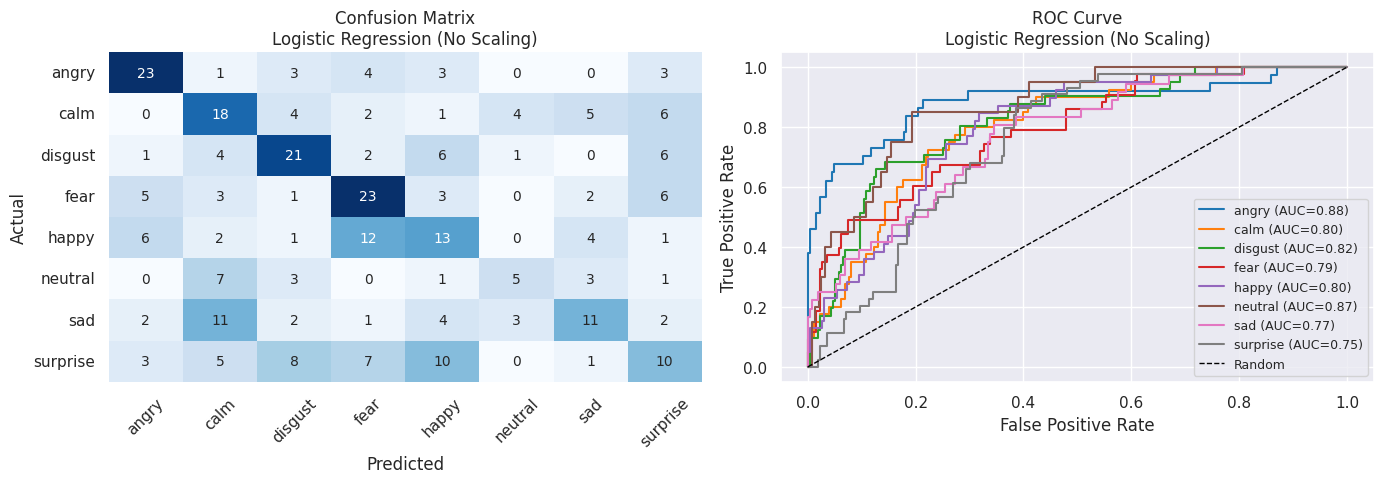


Training Random Forest (No Scaling)...


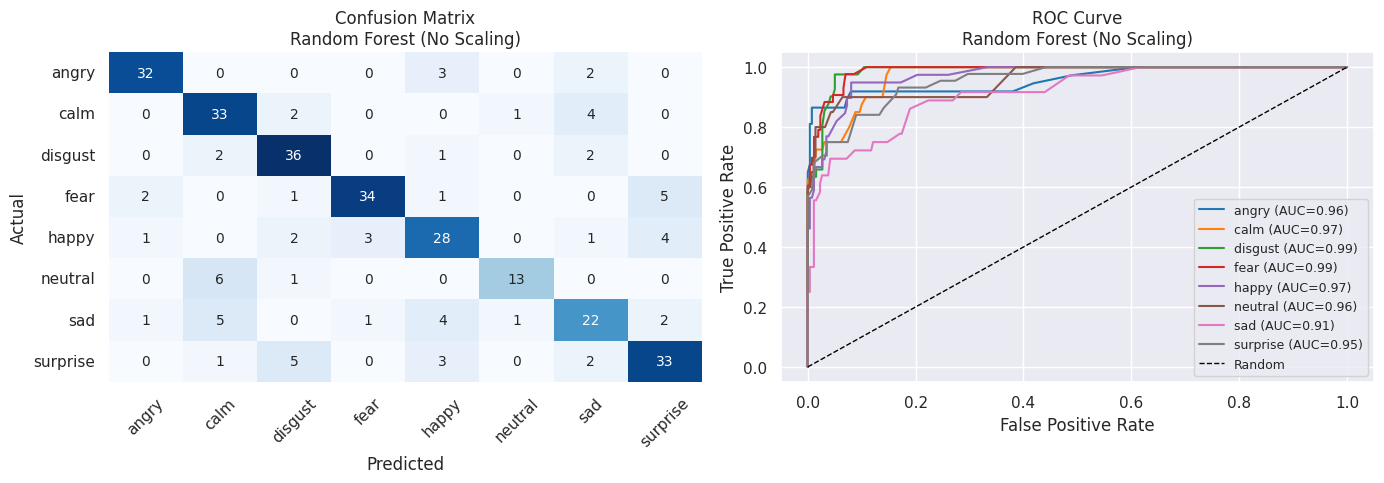


Training Extra Trees (No Scaling)...


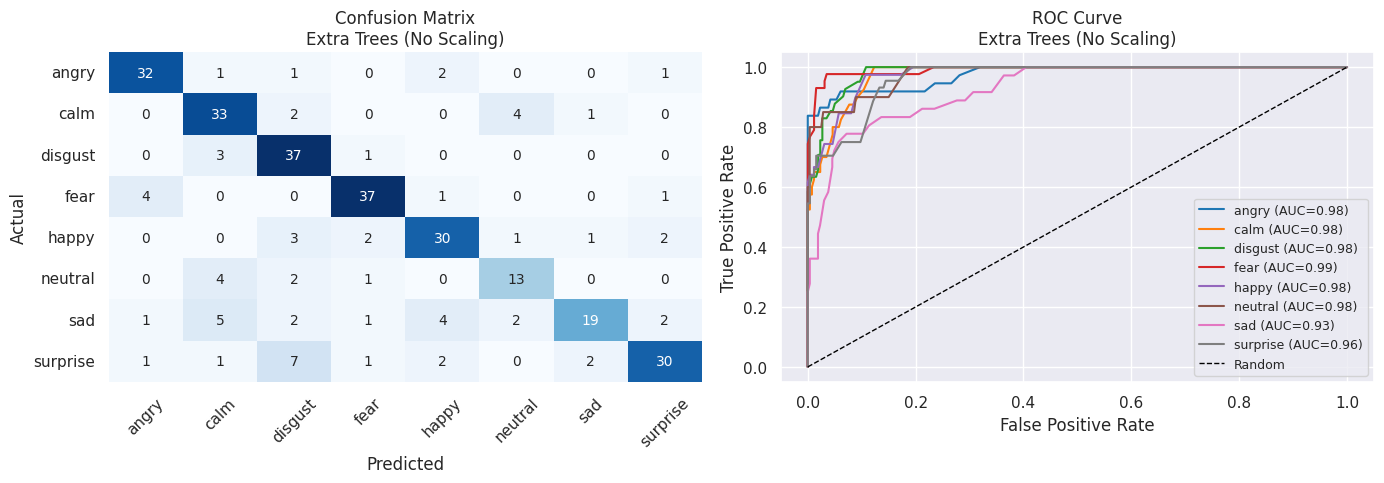


Training Gradient Boosting (No Scaling)...


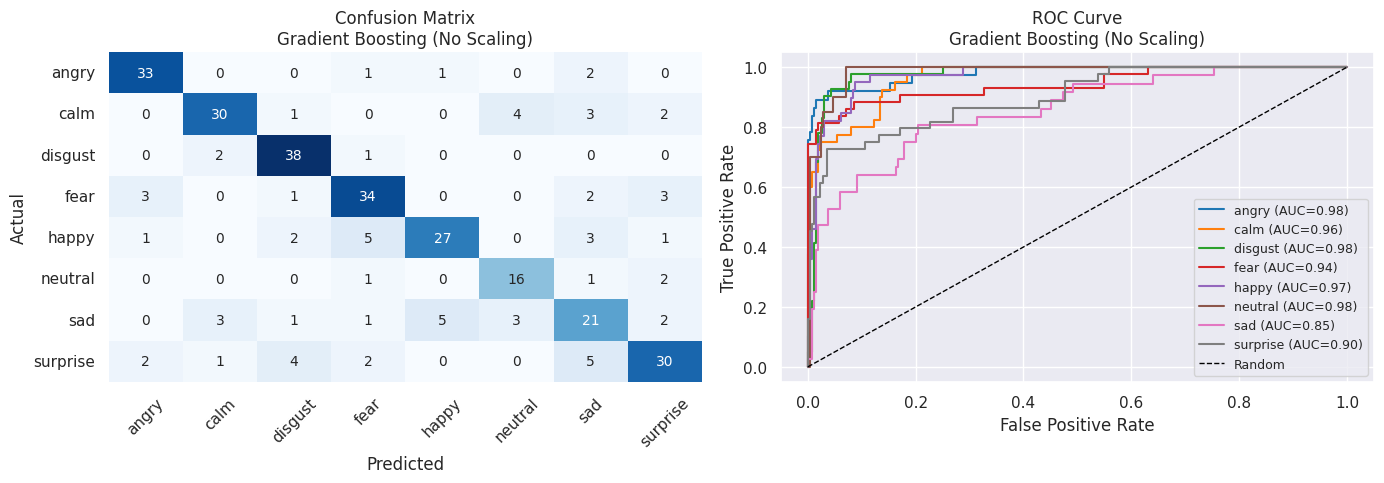


Training XGBoost (No Scaling)...


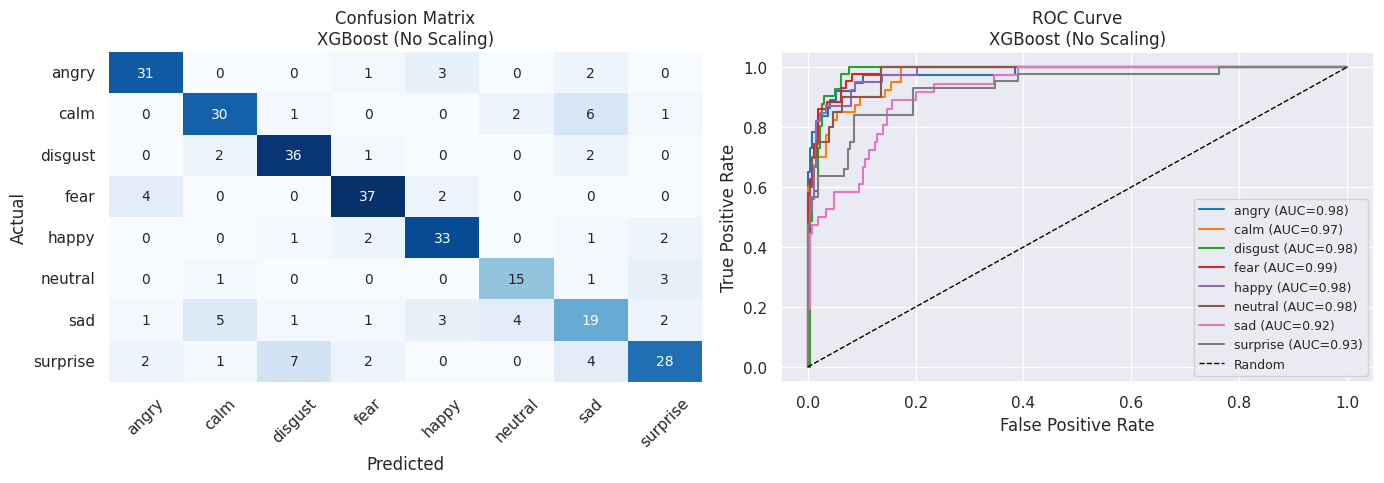


Training SVM (Linear) (No Scaling)...


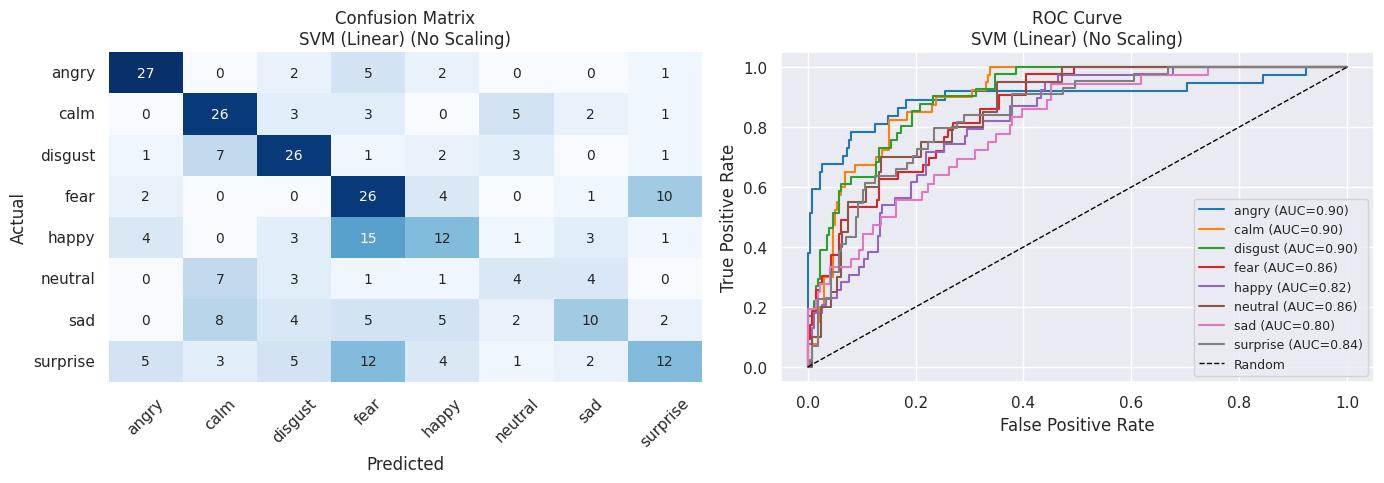


Training SVM (RBF) (No Scaling)...


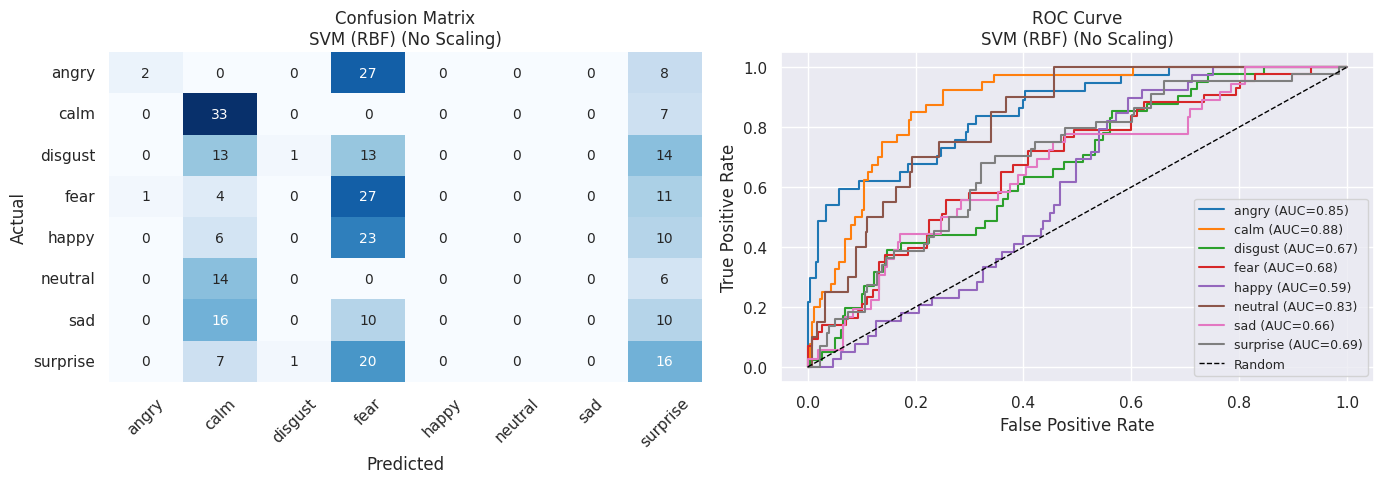


Training KNN (No Scaling)...


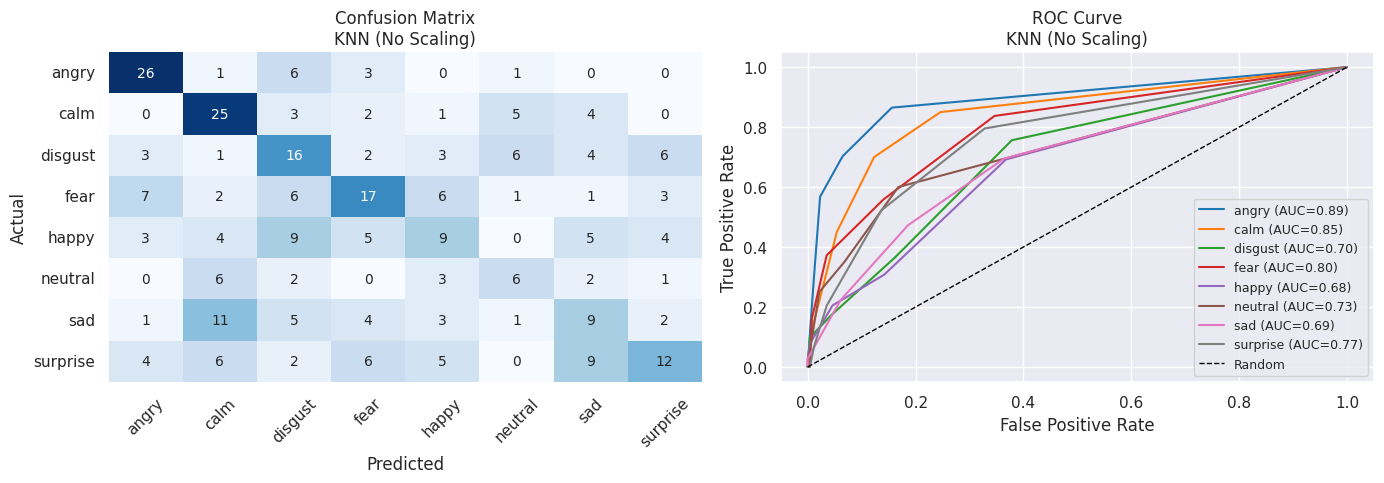


Training MLP (Neural Net) (No Scaling)...


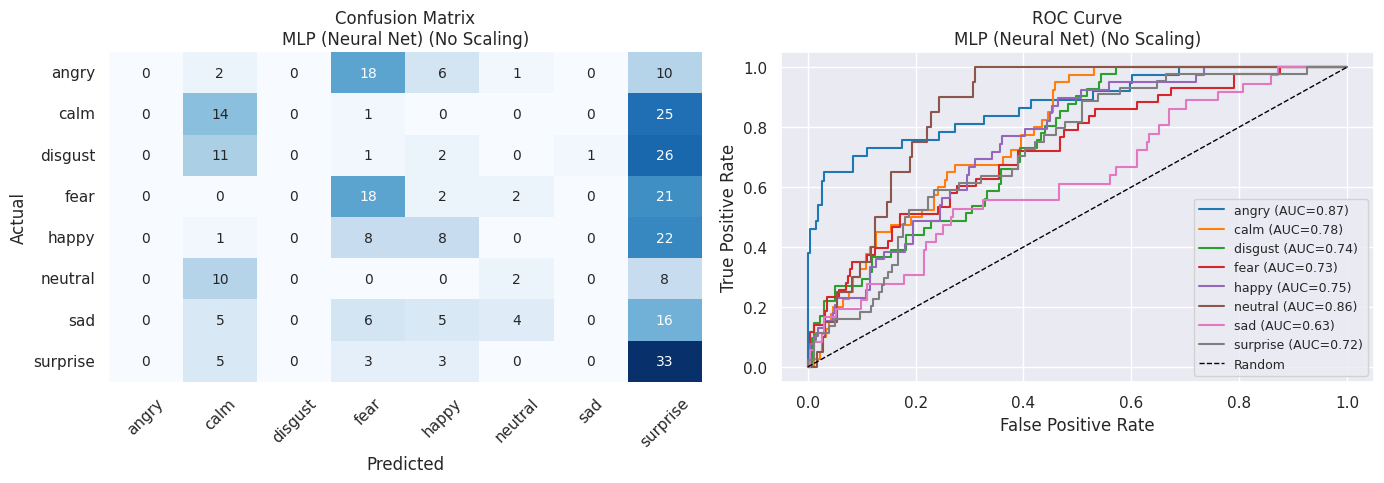


Training AdaBoost (No Scaling)...


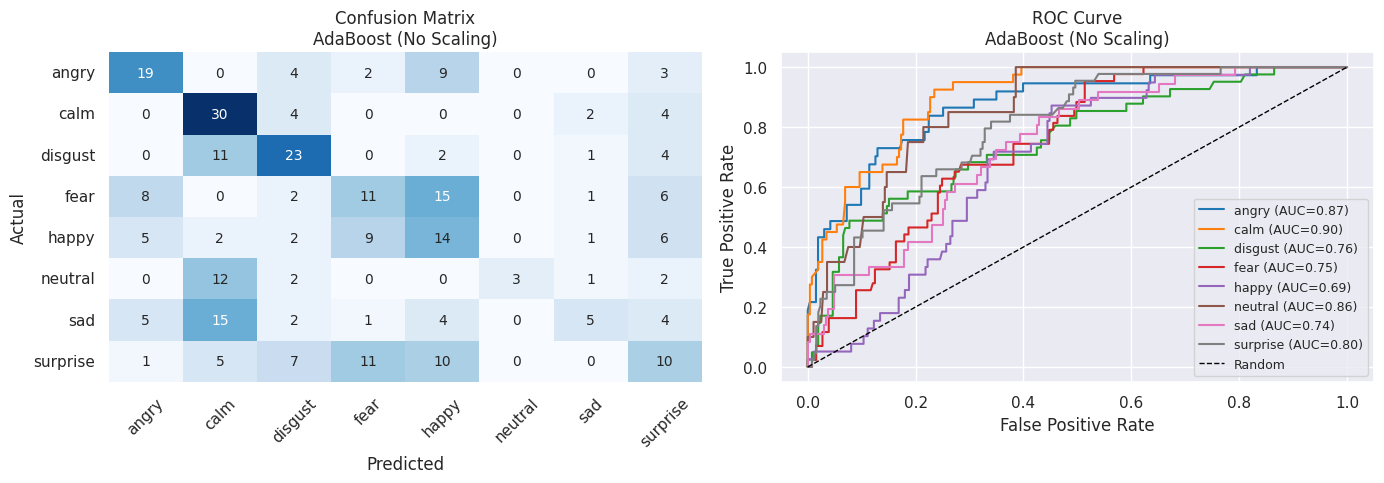


Training Bagging (No Scaling)...


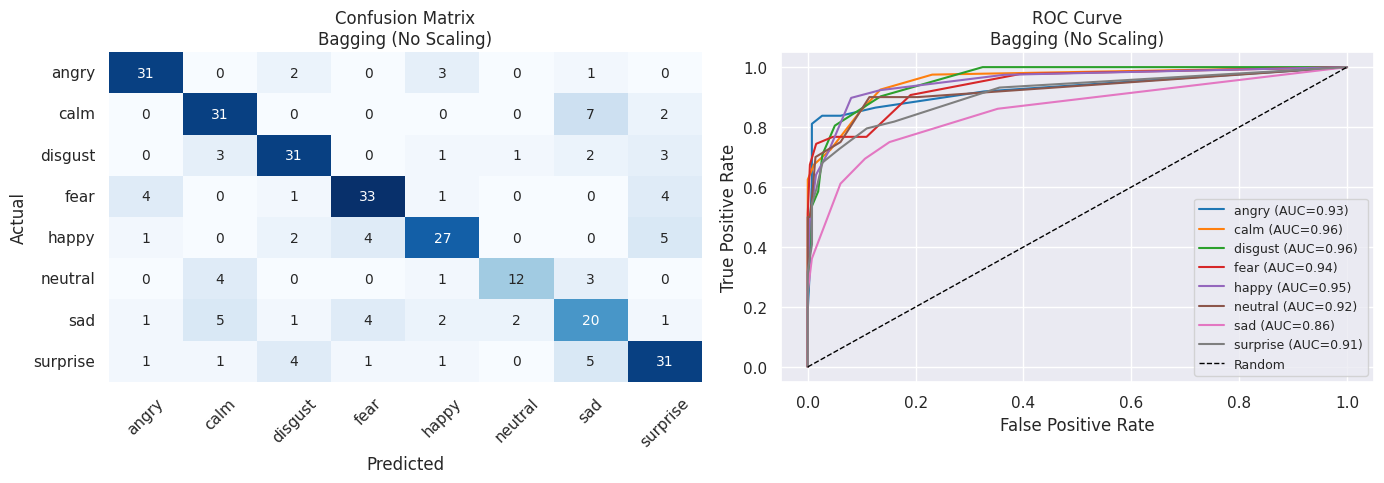


Training Naive Bayes (No Scaling)...


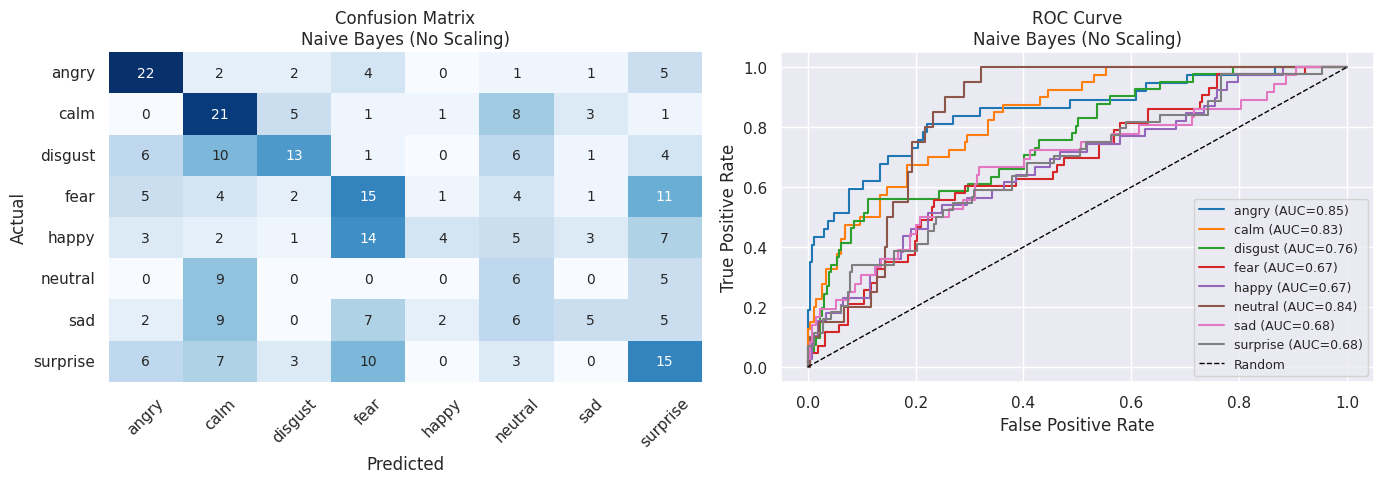


Training QDA (No Scaling)...


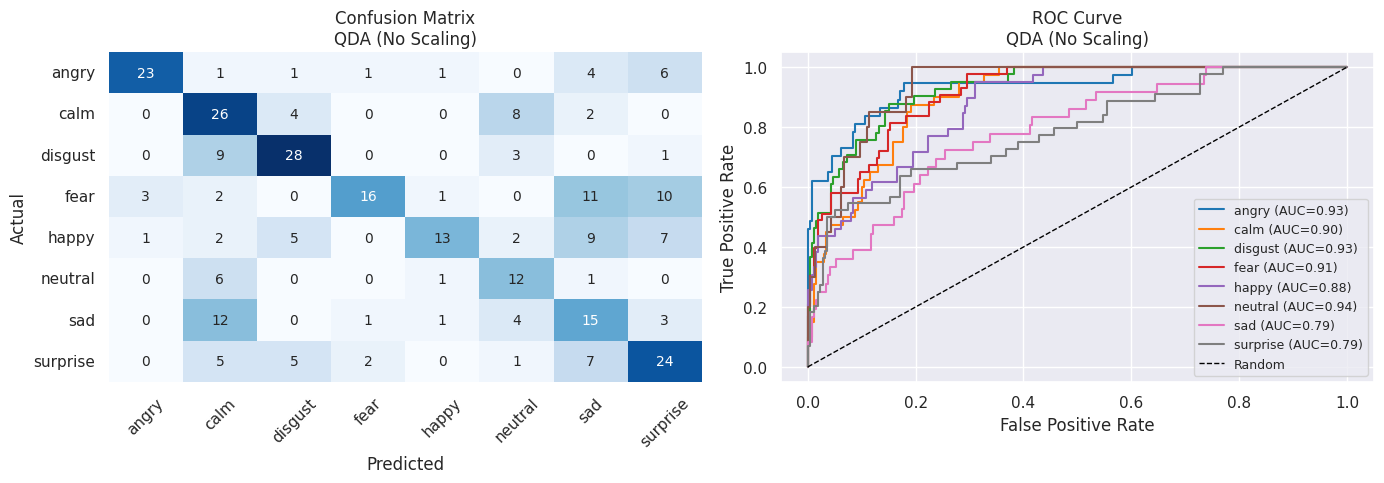


Training LightGBM (No Scaling)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4160
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 17
[LightGBM] [Info] Start training from score -2.106470
[LightGBM] [Info] Start training from score -2.002481
[LightGBM] [Info] Start training from score -1.996327
[LightGBM] [Info] Start training from score -1.954278
[LightGBM] [Info] Start training from score -2.033831
[LightGBM] [Info] Start training from score -2.720629
[LightGBM] [Info] Start training from score -2.113343
[LightGBM] [Info] Start training from score -1.908293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

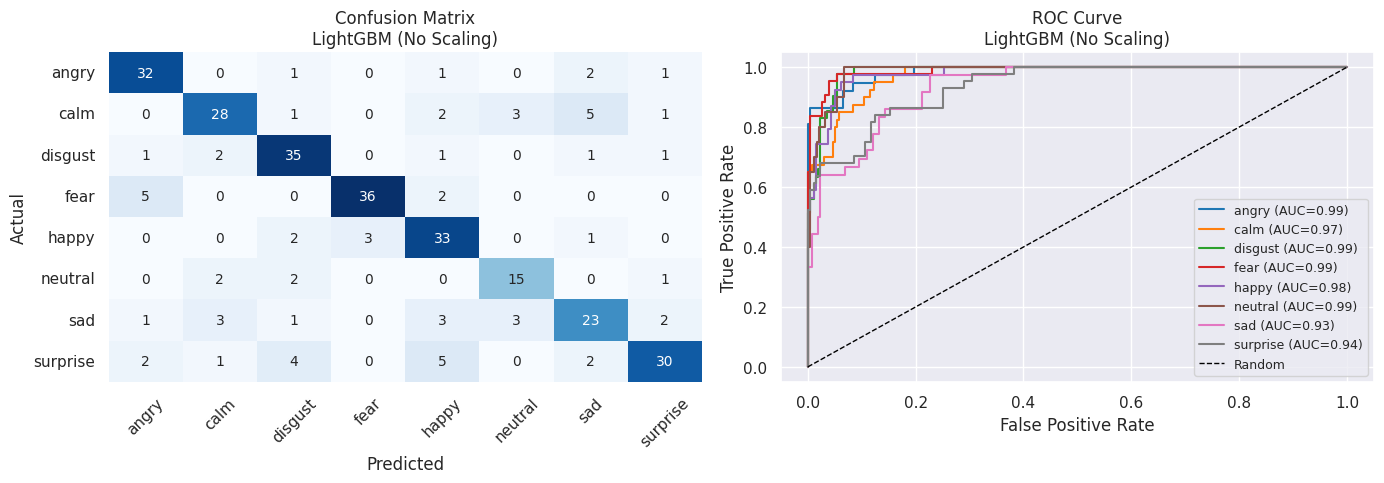

In [ ]:
results_no_scaling = train_evaluate_and_plot(X_train, X_test, y_train, y_test, label_suffix=" (No Scaling)")

## Modelling with ***StandardScaler***

### Split Train and Test Data with ***StandardScaler***

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_scaled.shape

(1200, 17)

In [ ]:
X_test_scaled.shape

(300, 17)

In [ ]:
y_train_scaled.shape

(1200,)

In [ ]:
y_test_scaled.shape

(300,)

### Train models and plot results with ***StandardScaler***


Training Logistic Regression (Scaled)...


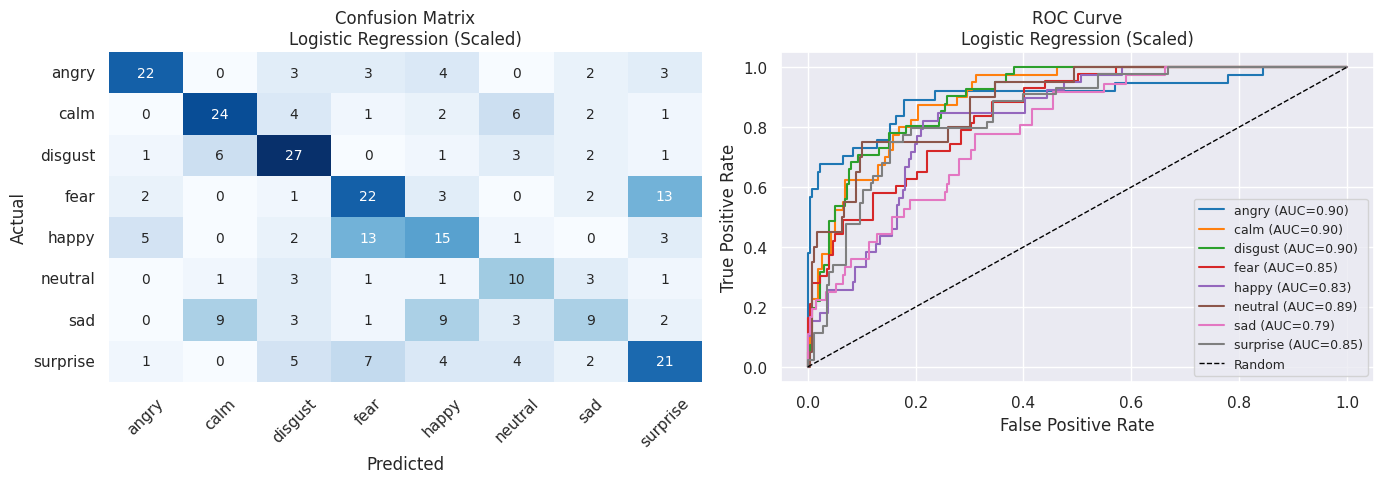


Training Random Forest (Scaled)...


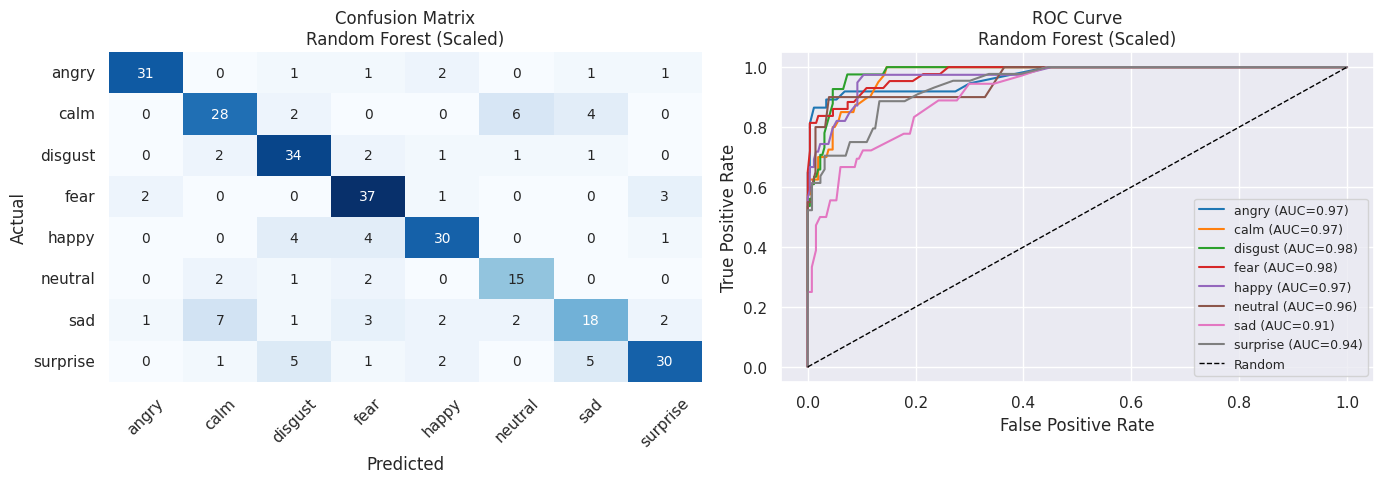


Training Extra Trees (Scaled)...


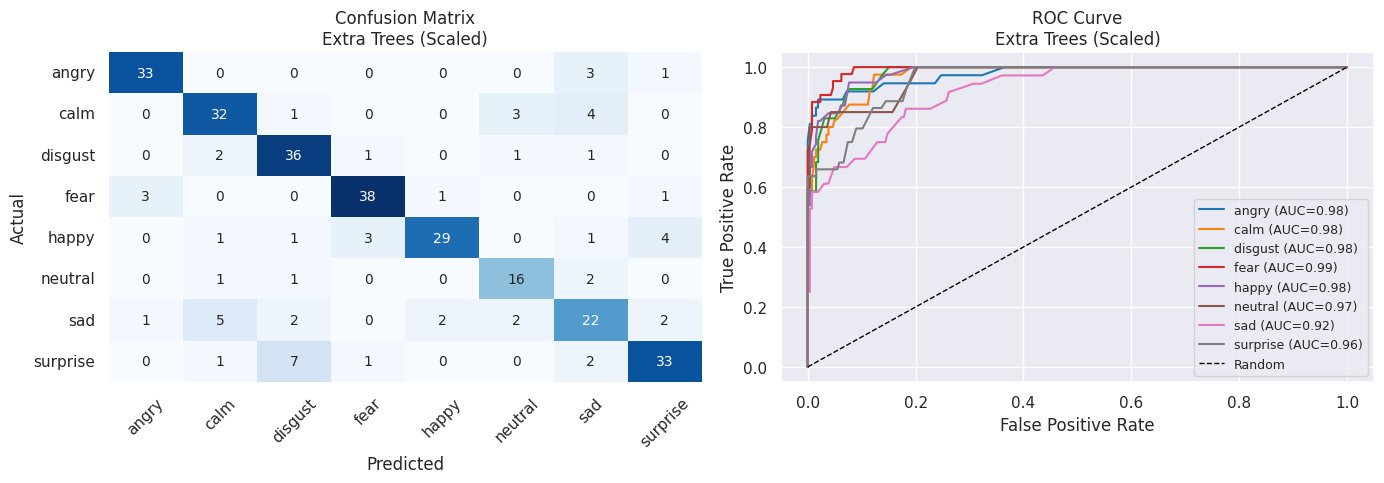


Training Gradient Boosting (Scaled)...


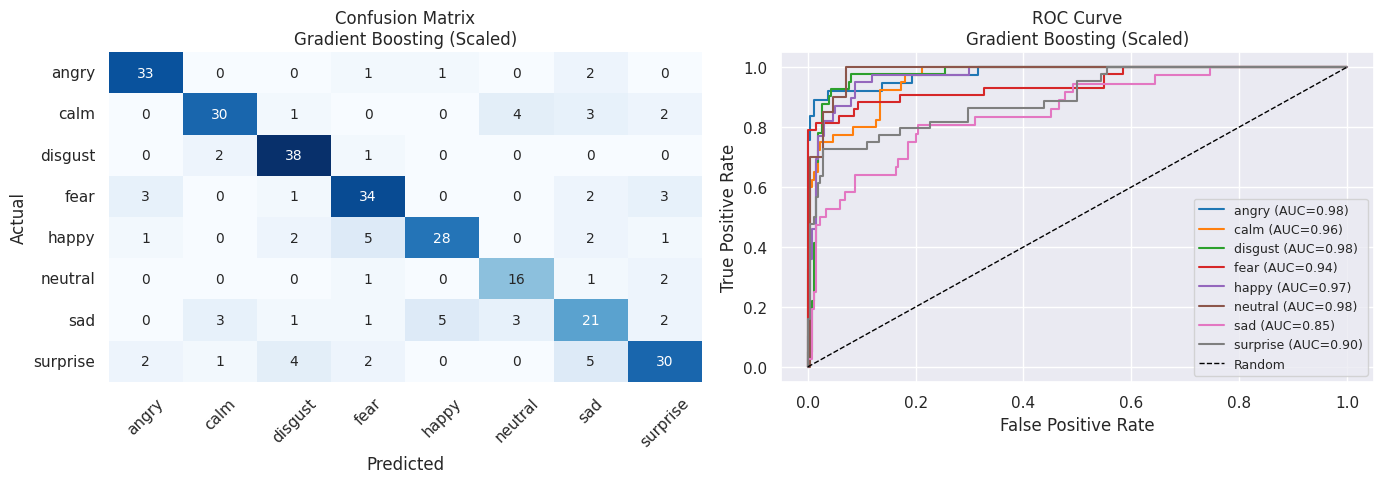


Training XGBoost (Scaled)...


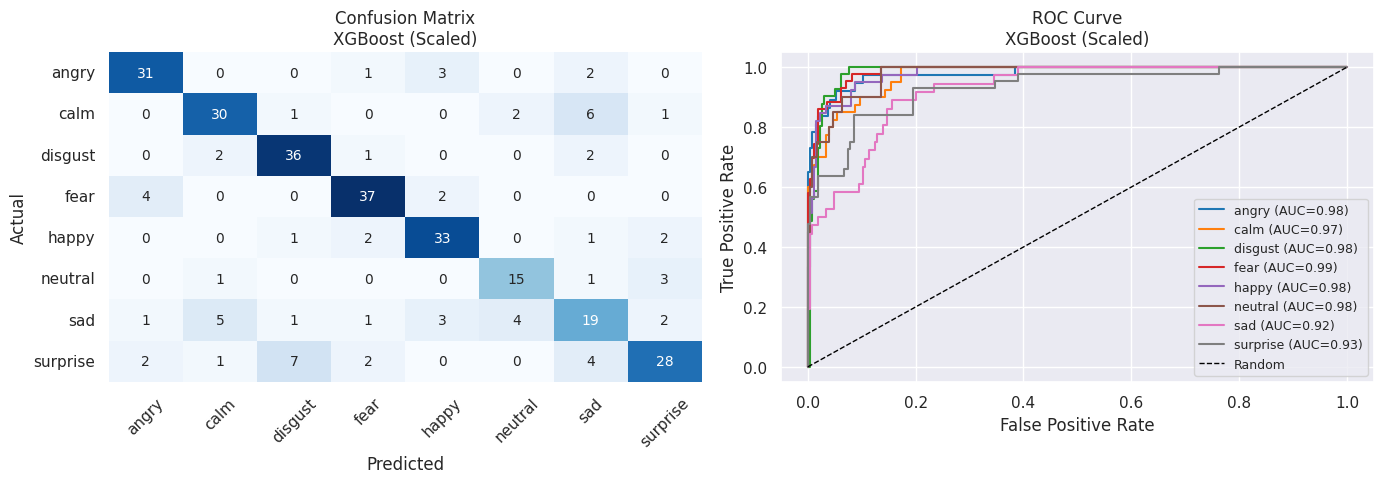


Training SVM (Linear) (Scaled)...


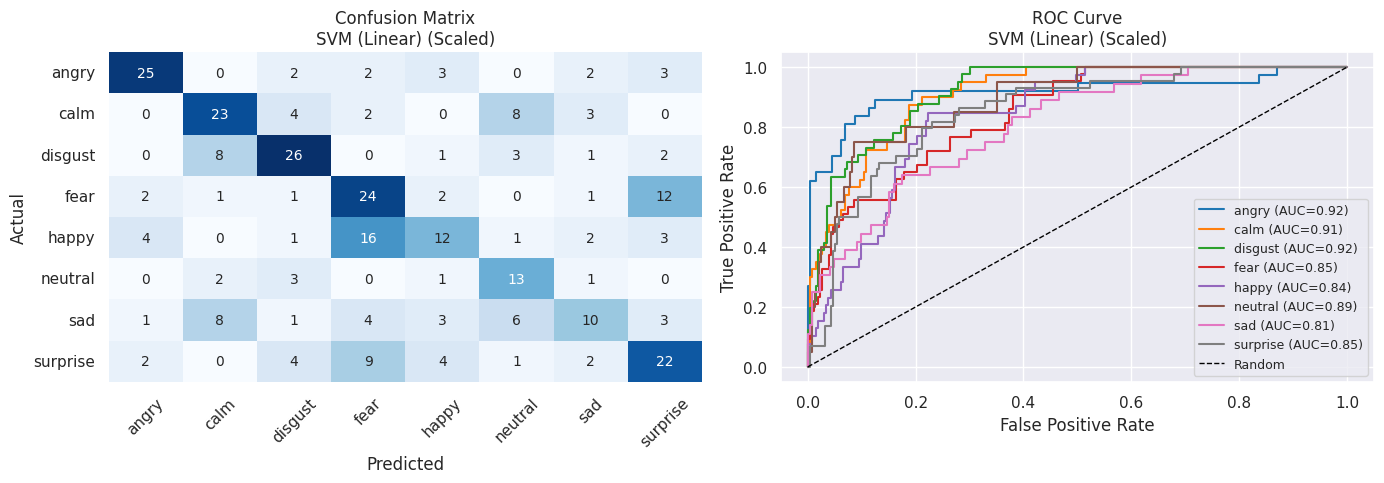


Training SVM (RBF) (Scaled)...


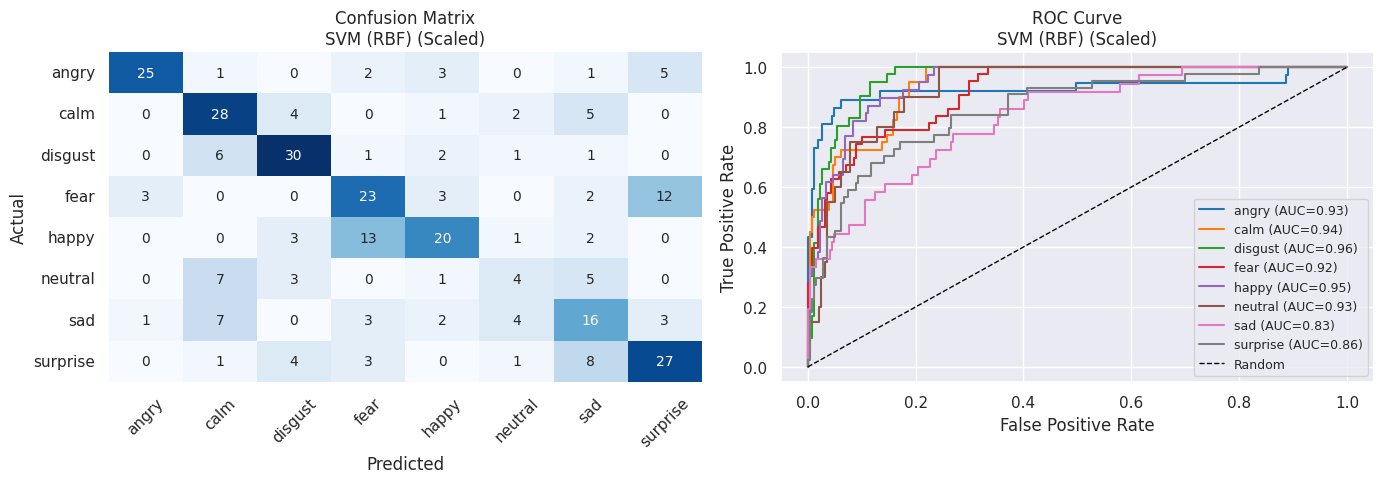


Training KNN (Scaled)...


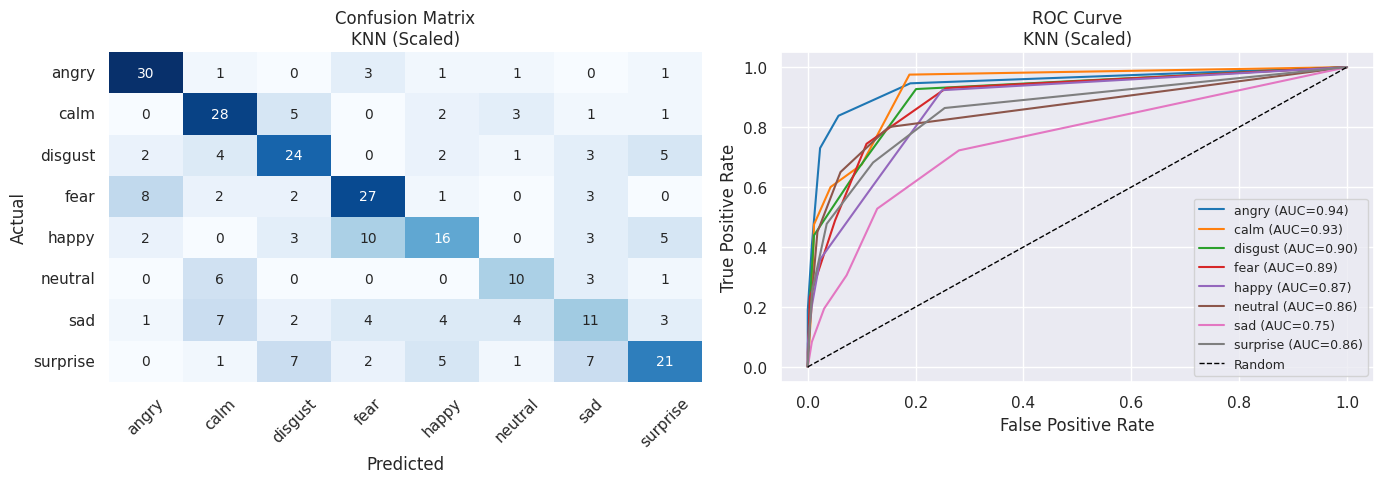


Training MLP (Neural Net) (Scaled)...


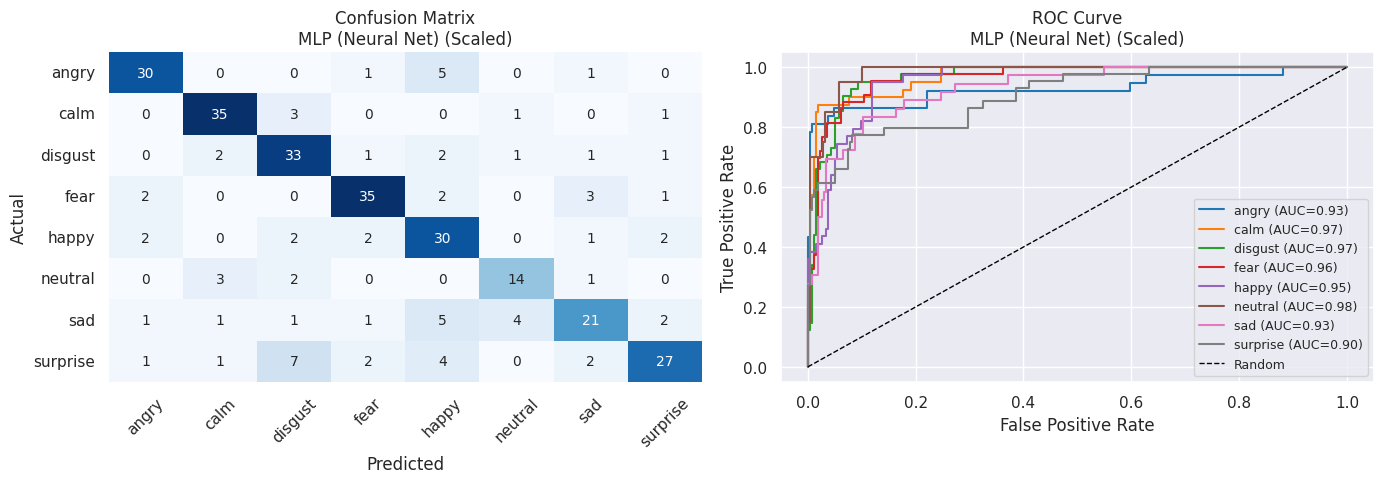


Training AdaBoost (Scaled)...


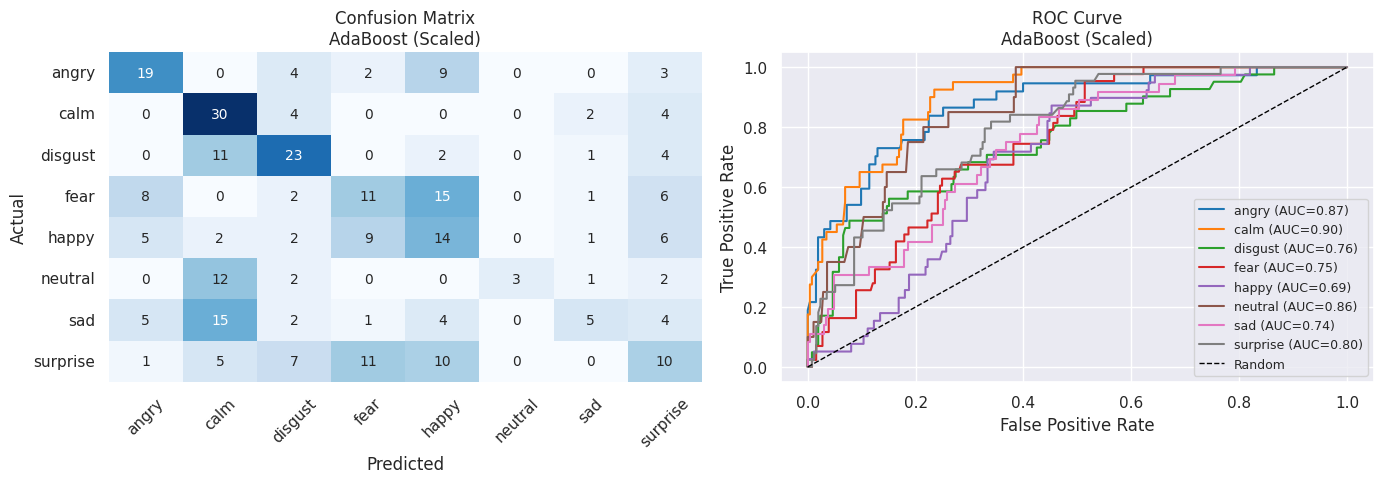


Training Bagging (Scaled)...


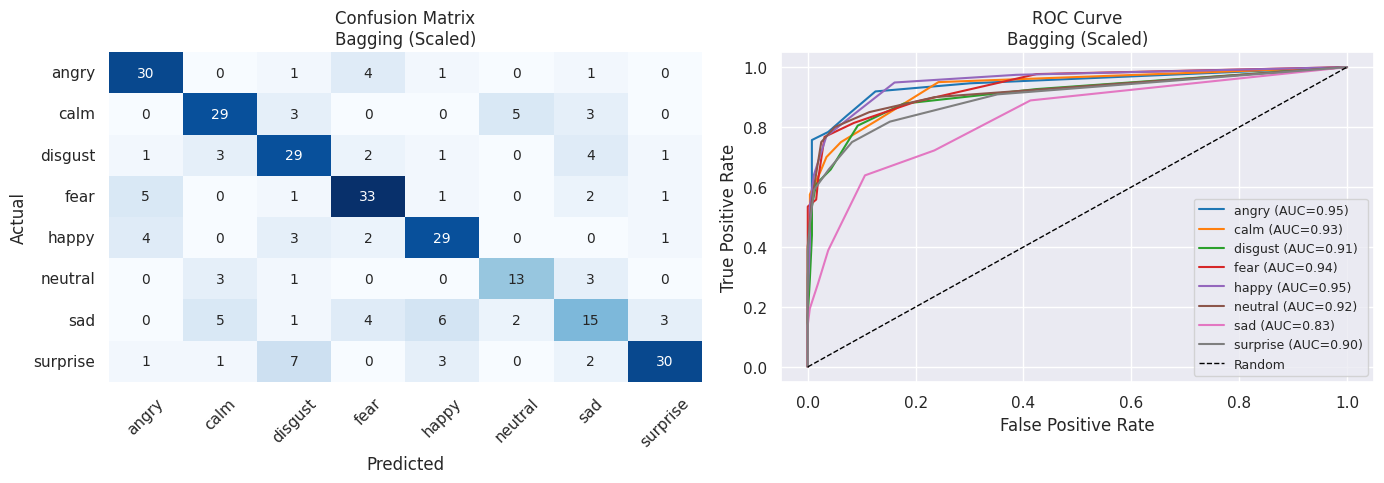


Training Naive Bayes (Scaled)...


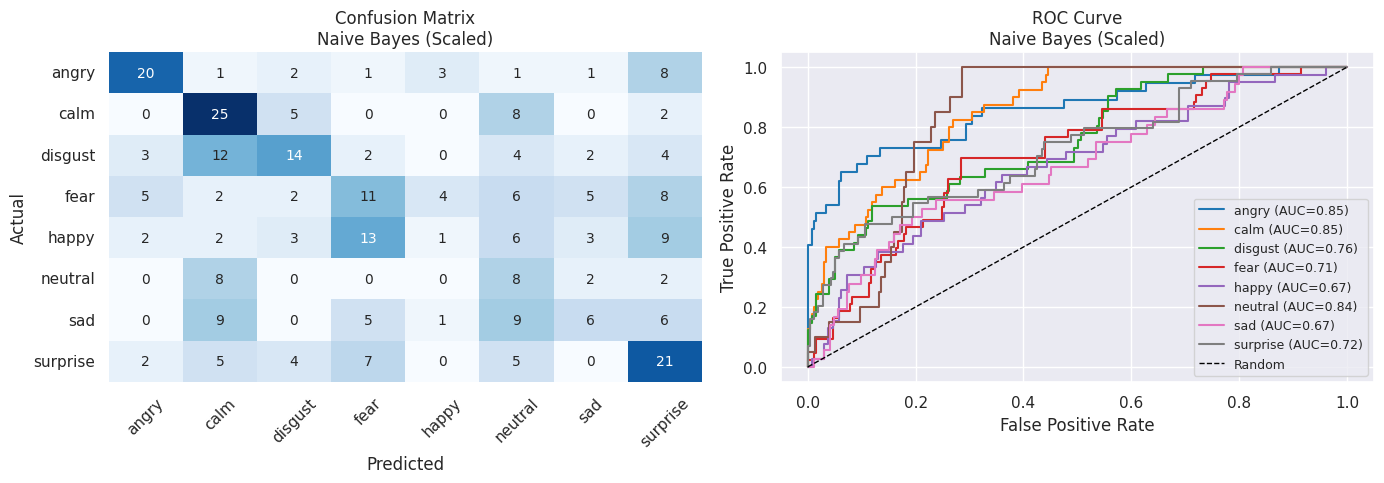


Training QDA (Scaled)...


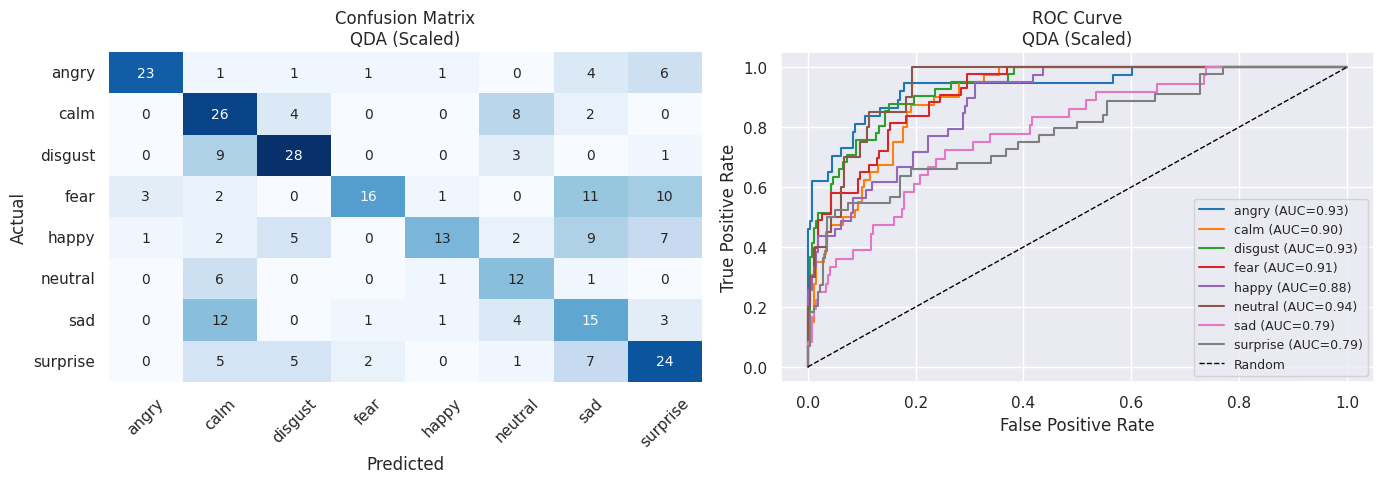


Training LightGBM (Scaled)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4159
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 17
[LightGBM] [Info] Start training from score -2.106470
[LightGBM] [Info] Start training from score -2.002481
[LightGBM] [Info] Start training from score -1.996327
[LightGBM] [Info] Start training from score -1.954278
[LightGBM] [Info] Start training from score -2.033831
[LightGBM] [Info] Start training from score -2.720629
[LightGBM] [Info] Start training from score -2.113343
[LightGBM] [Info] Start training from score -1.908293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

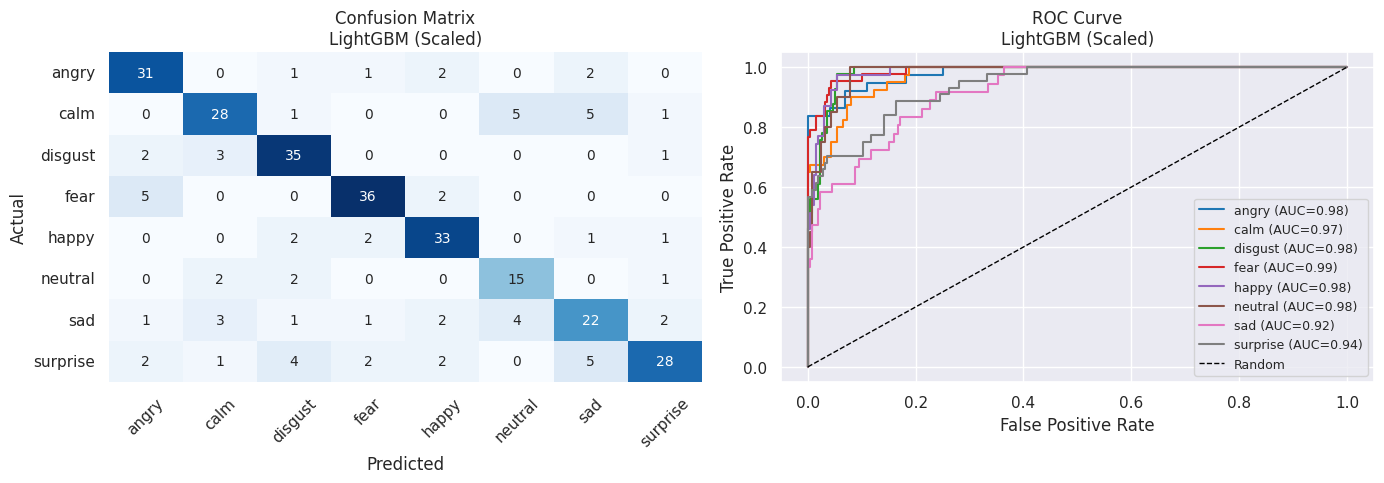

In [ ]:
results_scaled = train_evaluate_and_plot(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, label_suffix=" (Scaled)")

# Visualization of combined results (without ***StandardScaler*** and with ***StandardScaler***)

- I **concatenated all the results** of the models with scaling and the models without scaling using `pd.concat`.
- I **looked at all the models** from three angles:
  - **Accuracy**
  - **Loss**
  - **Precision**
  - **Recall**
  - **F1 Score**
- I  **created bar plots**:
  - the first column for each model was the metrics from models with no scaling
  - the second column was the metrics from models that had scaling
  - I used distinct color bars for different metrics.
  - I displayed the metrics for train and test data in a **side by side** comparison
- I **situated a performance increase** or drop due to scaling across all models.
- I prepared ladder and waterfall plots:
  - I only looked at the **test results** for the scaled models in these plots.
  - The models were sorted from best to worst, based on metric.
  - Ladder plot demonstrates stepwise comparison.
  - Waterfall plot shows accumulated contributions.
- Analytics was done looking at which models that had a performance increase due to scaling, namely Extra Trees stood out as all performing better in the scaled mode.

In [ ]:
combined_ml_model_results = pd.concat([results_no_scaling, results_scaled])

In [ ]:
combined_ml_model_results

Model    Set  Accuracy      Loss  Precision  \
0   Logistic Regression (No Scaling)  Train  0.456667  0.543333   0.447270   
1   Logistic Regression (No Scaling)   Test  0.413333  0.586667   0.408895   
2         Random Forest (No Scaling)  Train  1.000000  0.000000   1.000000   
3         Random Forest (No Scaling)   Test  0.770000  0.230000   0.774951   
4           Extra Trees (No Scaling)  Train  1.000000  0.000000   1.000000   
5           Extra Trees (No Scaling)   Test  0.770000  0.230000   0.779138   
6     Gradient Boosting (No Scaling)  Train  0.997500  0.002500   0.997516   
7     Gradient Boosting (No Scaling)   Test  0.763333  0.236667   0.765111   
8               XGBoost (No Scaling)  Train  1.000000  0.000000   1.000000   
9               XGBoost (No Scaling)   Test  0.763333  0.236667   0.762135   
10         SVM (Linear) (No Scaling)  Train  0.566667  0.433333   0.563705   
11         SVM (Linear) (No Scaling)   Test  0.476667  0.523333   0.471478   
12            SVM (RBF) (No Scaling)  Train  0.269167  0.730833   0.209335   
13            SVM (RBF) (No Scaling)   Test  0.263333  0.736667   0.258735   
14                  KNN (No Scaling)  Train  0.594167  0.405833   0.597091   
15                  KNN (No Scaling)   Test  0.400000  0.600000   0.393129   
16     MLP (Neural Net) (No Scaling)  Train  0.285000  0.715000   0.319664   
17     MLP (Neural Net) (No Scaling)   Test  0.250000  0.750000   0.170675   
18             AdaBoost (No Scaling)  Train  0.384167  0.615833   0.408434   
19             AdaBoost (No Scaling)   Test  0.383333  0.616667   0.422229   
20              Bagging (No Scaling)  Train  0.995000  0.005000   0.995051   
21              Bagging (No Scaling)   Test  0.720000  0.280000   0.723338   
22          Naive Bayes (No Scaling)  Train  0.358333  0.641667   0.396380   
23          Naive Bayes (No Scaling)   Test  0.336667  0.663333   0.374719   
24                  QDA (No Scaling)  Train  0.645000  0.355000   0.694961   
25                  QDA (No Scaling)   Test  0.523333  0.476667   0.595580   
26             LightGBM (No Scaling)  Train  1.000000  0.000000   1.000000   
27             LightGBM (No Scaling)   Test  0.773333  0.226667   0.778551   
0       Logistic Regression (Scaled)  Train  0.559167  0.440833   0.557897   
1       Logistic Regression (Scaled)   Test  0.500000  0.500000   0.502323   
2             Random Forest (Scaled)  Train  1.000000  0.000000   1.000000   
3             Random Forest (Scaled)   Test  0.743333  0.256667   0.746356   
4               Extra Trees (Scaled)  Train  1.000000  0.000000   1.000000   
5               Extra Trees (Scaled)   Test  0.796667  0.203333   0.800529   
6         Gradient Boosting (Scaled)  Train  0.997500  0.002500   0.997516   
7         Gradient Boosting (Scaled)   Test  0.766667  0.233333   0.767698   
8                   XGBoost (Scaled)  Train  1.000000  0.000000   1.000000   
9                   XGBoost (Scaled)   Test  0.763333  0.236667   0.762135   
10             SVM (Linear) (Scaled)  Train  0.596667  0.403333   0.598028   
11             SVM (Linear) (Scaled)   Test  0.516667  0.483333   0.521989   
12                SVM (RBF) (Scaled)  Train  0.760000  0.240000   0.767457   
13                SVM (RBF) (Scaled)   Test  0.576667  0.423333   0.581448   
14                      KNN (Scaled)  Train  0.767500  0.232500   0.769070   
15                      KNN (Scaled)   Test  0.556667  0.443333   0.548900   
16         MLP (Neural Net) (Scaled)  Train  0.970833  0.029167   0.970859   
17         MLP (Neural Net) (Scaled)   Test  0.750000  0.250000   0.755679   
18                 AdaBoost (Scaled)  Train  0.384167  0.615833   0.408434   
19                 AdaBoost (Scaled)   Test  0.383333  0.616667   0.422229   
20                  Bagging (Scaled)  Train  0.995000  0.005000   0.995045   
21                  Bagging (Scaled)   Test  0.693333  0.306667   0.693330   
22              Naive Bayes (Scaled)  Train  0.384167

## Bar Plots of all models (1st column: without scaling and 2nd column: with scaling)

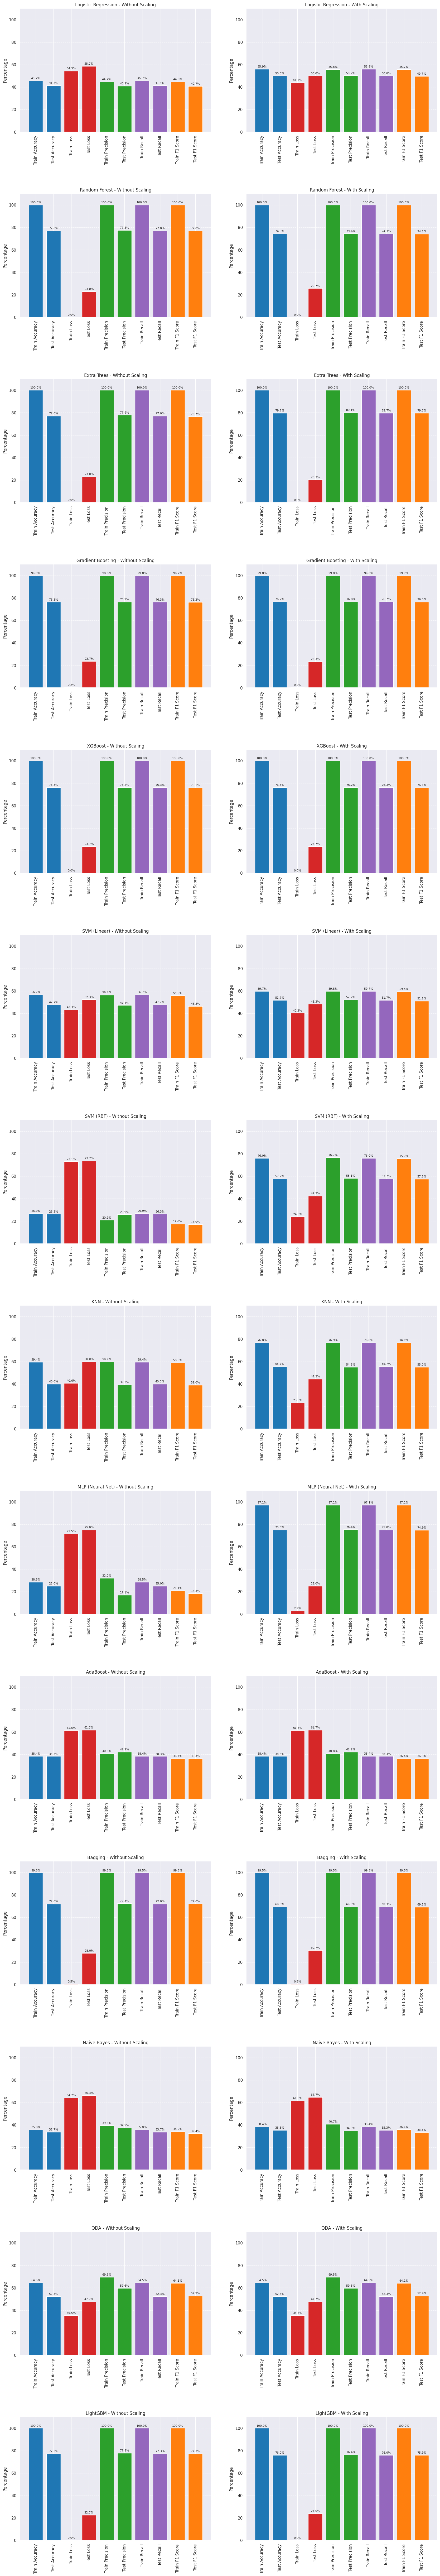

In [ ]:
# Define colors for each metric
metric_colors = {
    'Accuracy': 'tab:blue',
    'Loss': 'tab:red',
    'Precision': 'tab:green',
    'Recall': 'tab:purple',
    'F1 Score': 'tab:orange'
}

models = combined_ml_model_results[combined_ml_model_results['Model'].str.contains('No Scaling')]['Model'].str.replace(' (No Scaling)', '').unique()
metrics = ['Accuracy', 'Loss', 'Precision', 'Recall', 'F1 Score']
sets = ['Train', 'Test']

fig, axes = plt.subplots(len(models), 2, figsize=(18, 7 * len(models)))
fig.tight_layout(pad=5.0)

for i, model in enumerate(models):
    for j, scaling in enumerate(['No Scaling', 'Scaled']):
        ax = axes[i, j] if len(models) > 1 else axes[j]
        model_name = f"{model} ({scaling})"
        data = combined_ml_model_results[combined_ml_model_results['Model'] == model_name]

        # Prepare data for plotting
        values = []
        labels = []
        bar_colors = []
        for metric in metrics:
            for set_type in sets:
                row = data[data['Set'] == set_type]
                if not row.empty:
                    value = row.iloc[0][metric]
                    values.append(value * 100)  # Convert to percentage
                    labels.append(f"{set_type} {metric}")
                    bar_colors.append(metric_colors[metric])

        # Plot
        bars = ax.bar(labels, values, color=bar_colors)
        ax.set_ylim(0, 110)
        ax.set_ylabel('Percentage')
        ax.set_title(f"{model} - {'Without Scaling' if scaling == 'No Scaling' else 'With Scaling'}")
        ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=8)
        ax.tick_params(axis='x', rotation=90)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(hspace=0.5)
plt.show()

## Visulaize the best model of scaled ones in 2 different plots (1st column: ladder plot and 2nd column: scatter plot)

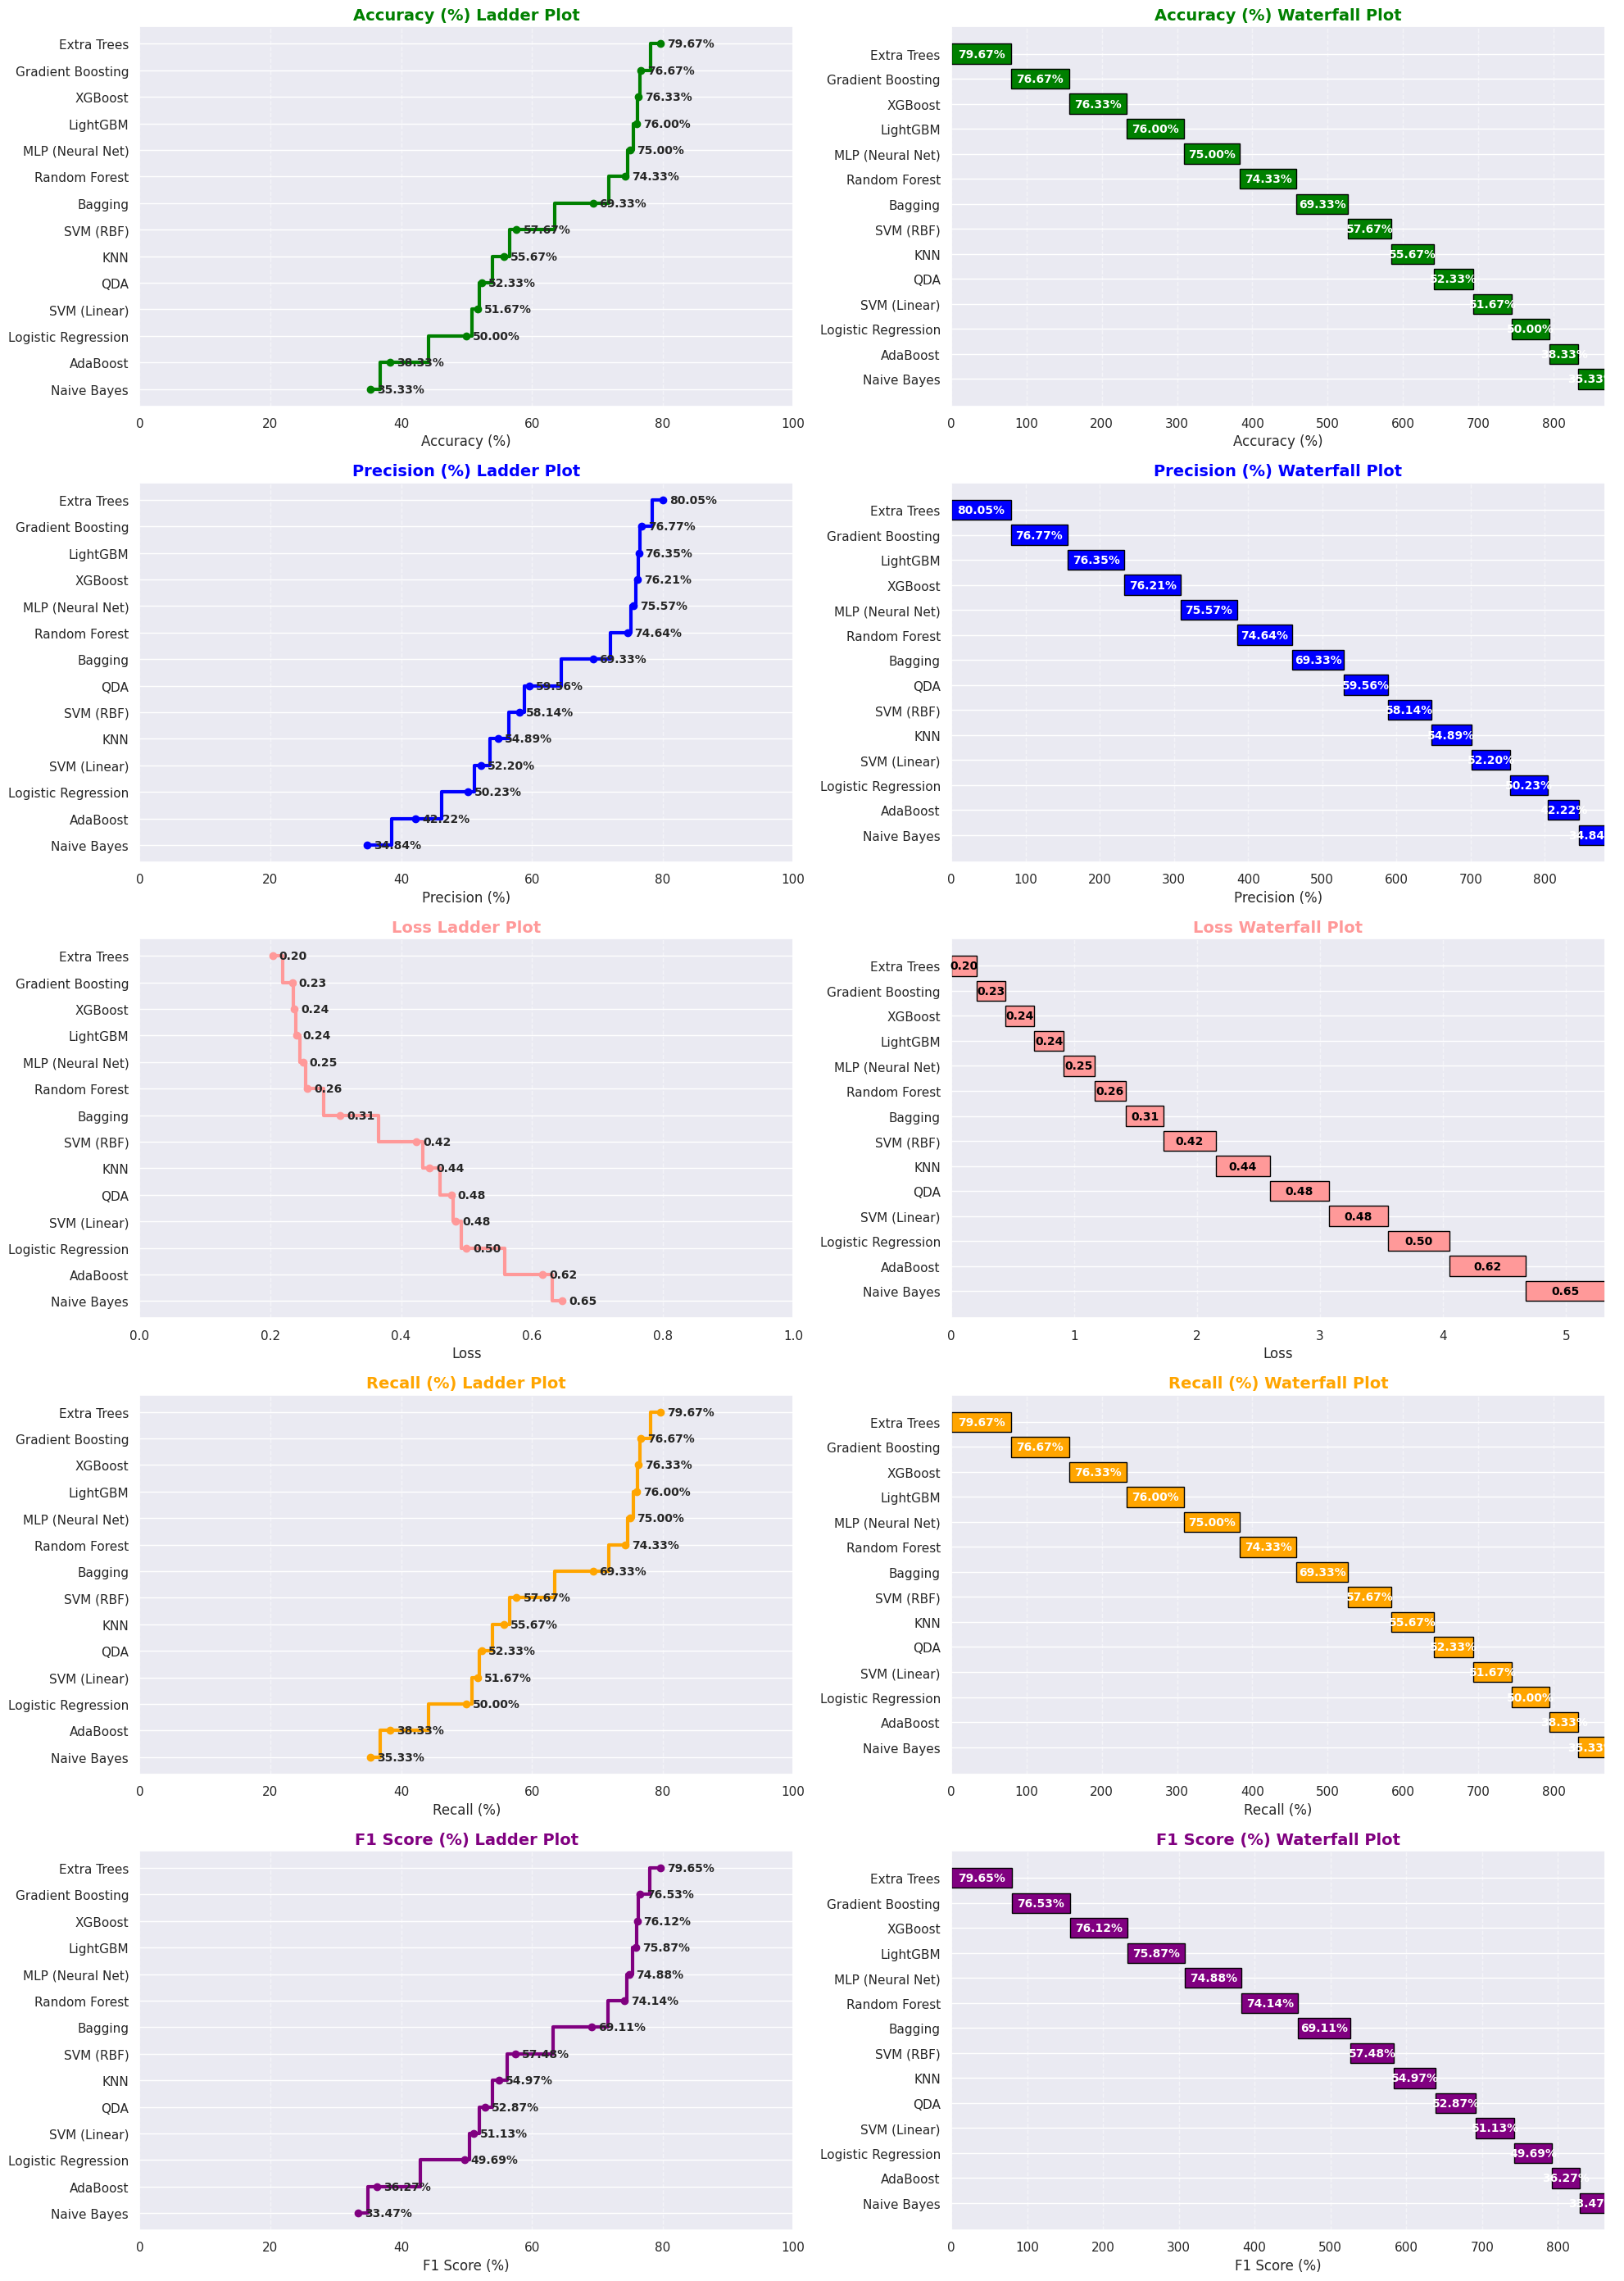

In [ ]:
# Prepare DataFrame as before
combined_ml_model_results_copy = combined_ml_model_results.copy()
combined_ml_model_results_copy_test = combined_ml_model_results_copy[combined_ml_model_results_copy["Set"] == "Test"].copy()
combined_ml_model_results_copy_test["Scaled"] = combined_ml_model_results_copy_test["Model"].str.contains("Scaled")
combined_ml_model_results_copy_test["Model Name"] = combined_ml_model_results_copy_test["Model"].str.replace(r" \(Scaled\)| \(No Scaling\)", "", regex=True)

# Only scaled models
df_scaled = combined_ml_model_results_copy_test[combined_ml_model_results_copy_test["Scaled"]].copy()

# Metrics and their colors
metrics = [
    ("Accuracy", "Accuracy (%)", "green"),
    ("Precision", "Precision (%)", "blue"),
    ("Loss", "Loss", "#ff9999"),  # light red
    ("Recall", "Recall (%)", "orange"),
    ("F1 Score", "F1 Score (%)", "purple")
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(20, 28))
plt.subplots_adjust(hspace=0.35)

for i, (metric, metric_label, metric_color) in enumerate(metrics):
    # Sort models by metric (best to worst)
    ascending = True if metric == "Loss" else False
    df_metric = df_scaled.sort_values(metric, ascending=ascending).reset_index(drop=True)
    model_names = df_metric["Model Name"].tolist()
    metric_values = df_metric[metric].values
    y_pos = np.arange(len(model_names))

    # For percentage metrics, scale to 0-100
    if metric != "Loss":
        display_values = metric_values * 100
        value_fmt = "{:.2f}%"
        xlim = (0, 100)
    else:
        display_values = metric_values
        value_fmt = "{:.2f}"
        xlim = (0, 1)

    # --- Ladder (step) plot ---
    ax1 = axes[i, 0]
    ax1.step(display_values, y_pos, where='mid', linewidth=3, color=metric_color, marker='o')
    for idx, (val, label) in enumerate(zip(display_values, model_names)):
        ax1.text(val + (1 if metric != "Loss" else 0.01), idx, value_fmt.format(val), va="center", fontsize=10, fontweight='bold')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(model_names)
    ax1.set_title(f"{metric_label} Ladder Plot", fontsize=14, fontweight='bold', color=metric_color)
    ax1.set_xlabel(metric_label)
    ax1.set_xlim(xlim)
    ax1.invert_yaxis()
    ax1.grid(axis='x', linestyle='--', alpha=0.5)

    # --- Waterfall plot ---
    ax2 = axes[i, 1]
    cumulative = np.insert(np.cumsum(display_values[:-1]), 0, 0)
    for idx, (val, base) in enumerate(zip(display_values, cumulative)):
        ax2.barh(model_names[idx], val, left=base, color=metric_color, edgecolor='black')
        ax2.text(base + val/2, idx, value_fmt.format(val), va="center", ha="center", fontsize=10, fontweight='bold', color='white' if abs(val) > 10 else 'black')
    ax2.set_title(f"{metric_label} Waterfall Plot", fontsize=14, fontweight='bold', color=metric_color)
    ax2.set_xlabel(metric_label)
    ax2.set_xlim(0, cumulative[-1] + display_values[-1])
    ax2.invert_yaxis()
    ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Train the same with Basic Deep Learning Models

Let us understand this table of what kind of Deep Learning models I trained here.

| Model Name              | Architecture Layers                                                                 | Regularization                | Key Techniques                          | Optimizer | Loss Function            | Epochs | Batch Size | Output Activation |
|-------------------------|--------------------------------------------------------------------------------------|-------------------------------|------------------------------------------|-----------|--------------------------|--------|-------------|--------------------|
| **BasicNN_Dropout**     | Dense(128, ReLU) → Dropout(0.3) → Dense(64, ReLU) → Dropout(0.3)                     | Dropout(0.3)                  | Shallow network                          | Adam      | Categorical Crossentropy | 50     | 16          | Softmax            |
| **DeepNN_Regularized**  | Dense(256, ReLU) → Dropout(0.4) → Dense(128, ReLU) → Dropout(0.3) → Dense(64, ReLU) | Dropout(0.4, 0.3)             | Deeper network with heavy regularization | Adam      | Categorical Crossentropy | 50     | 16          | Softmax            |
| **BN_Activated_DeepNN** | Dense(256) → BN → ReLU → Dropout(0.3) → Dense(128) → BN → ReLU → Dropout(0.3) → Dense(64, ReLU) | Dropout(0.3), BatchNorm | Batch Normalization + ReLU activations   | Adam      | Categorical Crossentropy | 50     | 16          | Softmax            |


All models used one-hot encoded labels and were validated on the test set using:
- Accuracy
- Validation Accuracy
- Loss
- Validation Loss

The history of each training run was stored in the `histories` list for later evaluation.

In [ ]:
y_train_nn = to_categorical(y_train_scaled)
y_test_nn = to_categorical(y_test_scaled)

histories = []

## Shallow network with two dense layers and dropout

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(y_train_nn.shape[1], activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train_nn,
                      validation_data=(X_test_scaled, y_test_nn),
                      epochs=50, batch_size=16, verbose=1)

histories.append(('BasicNN_Dropout', history1))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1851 - loss: 2.0890 - val_accuracy: 0.3633 - val_loss: 1.7351
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3247 - loss: 1.7573 - val_accuracy: 0.4100 - val_loss: 1.5609
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3888 - loss: 1.6165 - val_accuracy: 0.4367 - val_loss: 1.4632
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4179 - loss: 1.5394 - val_accuracy: 0.4567 - val_loss: 1.3911
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 1.4665 - val_accuracy: 0.4767 - val_loss: 1.3330
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4797 - loss: 1.4104 - val_accuracy: 0.4767 - val_loss: 1.2943
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5150 - loss: 1.3410 - val_accuracy: 0.5233 - val_loss: 1.2468
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5387 - loss: 1.2931 - val_accuracy: 0.5333 - val_loss:

## Deeper network with 3 hidden layers and more dropout

In [ ]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(y_train_nn.shape[1], activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train_nn,
                      validation_data=(X_test_scaled, y_test_nn),
                      epochs=50, batch_size=16, verbose=1)

histories.append(('DeepNN_Regularized', history2))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1903 - loss: 2.0388 - val_accuracy: 0.3833 - val_loss: 1.7670
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3037 - loss: 1.8109 - val_accuracy: 0.4133 - val_loss: 1.5617
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3939 - loss: 1.6211 - val_accuracy: 0.4833 - val_loss: 1.4319
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4100 - loss: 1.5742 - val_accuracy: 0.4733 - val_loss: 1.3784
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4535 - loss: 1.5198 - val_accuracy: 0.5033 - val_loss: 1.3144
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4521 - loss: 1.4449 - val_accuracy: 0.5033 - val_loss: 1.3233
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5150 - loss: 1.3121 - val_accuracy: 0.5533 - val_loss: 1.2385
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5118 - loss: 1.3134 - val_accuracy: 0.5733 - val_loss:

## Batch normalization + activation after each dense layer + dropout

In [ ]:
model3 = Sequential()
model3.add(Dense(256, input_shape=(X_train_scaled.shape[1],)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(128))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dense(y_train_nn.shape[1], activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train_scaled, y_train_nn,
                      validation_data=(X_test_scaled, y_test_nn),
                      epochs=50, batch_size=16, verbose=1)

histories.append(('BN_Activated_DeepNN', history3))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2019 - loss: 2.1601 - val_accuracy: 0.3333 - val_loss: 1.7749
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3888 - loss: 1.6322 - val_accuracy: 0.4233 - val_loss: 1.5365
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4600 - loss: 1.4782 - val_accuracy: 0.5033 - val_loss: 1.3740
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4975 - loss: 1.3731 - val_accuracy: 0.5300 - val_loss: 1.2425
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4979 - loss: 1.3365 - val_accuracy: 0.5633 - val_loss: 1.1853
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5121 - loss: 1.3100 - val_accuracy: 0.5500 - val_loss: 1.1547
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5314 - loss: 1.3128 - val_accuracy: 0.5967 - val_loss: 1.1108
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5766 - loss: 1.1589 - val_accuracy: 0.5800 - val_loss

# Visualization of Deep Learning Model Results

## Model Comparison: Best Validation Accuracy and F1 Score

| Model Name              | Best Validation Accuracy (%) | F1 Score (%) |
|-------------------------|------------------------------|--------------|
| BN_Activated_DeepNN     | 78.67                        | 74.97        |
| DeepNN_Regularized      | 76.33                        | 72.94        |
| BasicNN_Dropout         | 66.67                        | 65.33        |

---

## Visualization Insights

- **Bar Plot**: Compared best validation accuracy and F1-score side by side for each model.
- **Line Plots**:
  - Training vs. Validation **Accuracy** for all models
  - Training vs. Validation **Loss** for all models
- **Colors and labels** clearly distinguish train and validation curves across epochs.

---

## Best Validation Accuracy (per model)

- `BN_Activated_DeepNN`: **78.67%** at epoch **45**
- `DeepNN_Regularized`: **76.33%** at epoch **49**
- `BasicNN_Dropout`: **66.67%** at epoch **44**

---

## F1 Score (macro average on test set)

- `BN_Activated_DeepNN`: **74.97%**
- `DeepNN_Regularized`: **72.94%**
- `BasicNN_Dropout`: **65.33%**

---

## Summary

- The **BN_Activated_DeepNN** outperformed other models in both **validation accuracy** and **F1 score**, thanks to:
  - Batch Normalization after Dense layers
  - ReLU activation layers
  - Dropout regularization
- All results stored and visualized using `histories` and `dl_model_df_results`.

> **Note**: All models were trained with 50 epochs and batch size of 16 using `categorical_crossentropy` loss and `adam` optimizer.

## Plot Training vs. Validation Accuracy and Loss

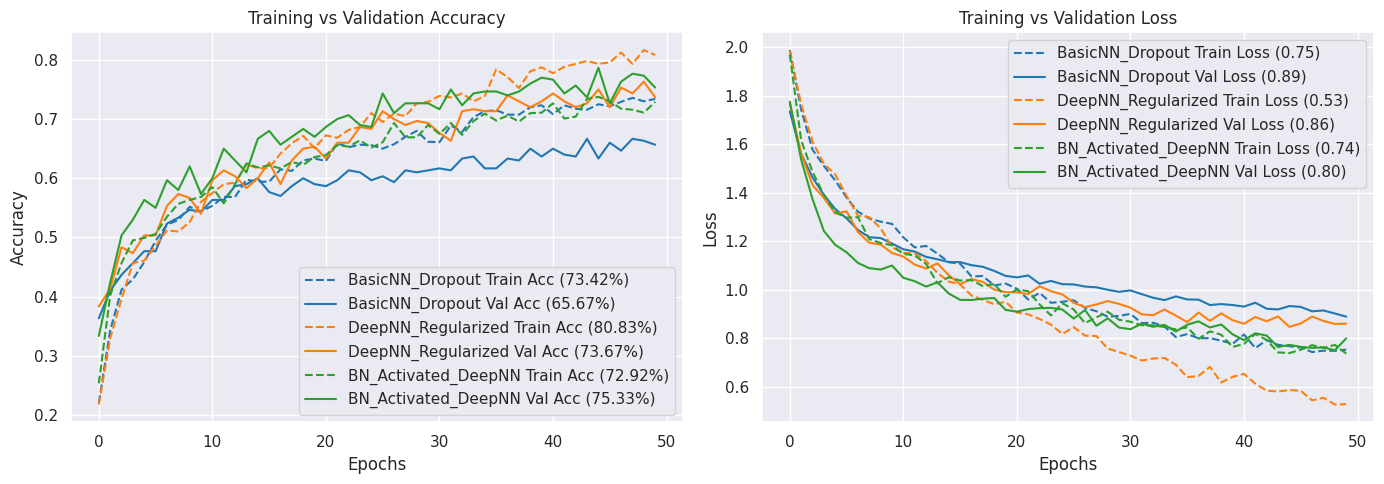

In [ ]:
colors = itertools.cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
for name, hist in histories:
    color = next(colors)
    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(train_acc, linestyle='--', label=f'{name} Train Acc ({train_acc[-1]*100:.2f}%)', color=color)
    plt.plot(val_acc, linestyle='-', label=f'{name} Val Acc ({val_acc[-1]*100:.2f}%)', color=color)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Reset color cycle for Loss Plot
colors = itertools.cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Loss Plot
plt.subplot(1, 2, 2)
for name, hist in histories:
    color = next(colors)
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(train_loss, linestyle='--', label=f'{name} Train Loss ({train_loss[-1]:.2f})', color=color)
    plt.plot(val_loss, linestyle='-', label=f'{name} Val Loss ({val_loss[-1]:.2f})', color=color)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Print best validation accuracy for each model

In [ ]:
for name, history in histories:
    val_acc = history.history['val_accuracy']
    best_epoch = np.argmax(val_acc)
    print(f"{name}: Best Val Accuracy = {val_acc[best_epoch]:.4f} at epoch {best_epoch+1}\n")

BasicNN_Dropout: Best Val Accuracy = 0.6667 at epoch 44

DeepNN_Regularized: Best Val Accuracy = 0.7633 at epoch 49

BN_Activated_DeepNN: Best Val Accuracy = 0.7867 at epoch 45



## Compute F1-Score for each model

In [ ]:
models = [model1, model2, model3]
model_names = [name for name, _ in histories]

for name, model in zip(model_names, models):
    # Predict class probabilities
    y_pred_probs = model.predict(X_test_scaled)
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_nn, axis=1)
    # Calculate F1 score (macro for multi-class)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"{name}: F1 Score (macro) = {f1:.4f}\n")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
BasicNN_Dropout: F1 Score (macro) = 0.6533

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
DeepNN_Regularized: F1 Score (macro) = 0.7294

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
BN_Activated_DeepNN: F1 Score (macro) = 0.7497



## Print the dataframe of Best Validation Accuracy and F1-Score of the models

In [ ]:
dl_model_results = []

for (name, history), model in zip(histories, models):
    val_acc = history.history['val_accuracy']
    best_val_acc = max(val_acc)
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_nn, axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')
    dl_model_results.append({'Model': name, 'Best-Validation-Accuracy (%)': best_val_acc * 100, 'F1-Score (%)': f1 * 100})

dl_model_df_results = pd.DataFrame(dl_model_results)
dl_model_df_results = dl_model_df_results.sort_values(by=['Best-Validation-Accuracy (%)', 'F1-Score (%)'], ascending=False)
dl_model_df_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Model  Best-Validation-Accuracy (%)  F1-Score (%)
2  BN_Activated_DeepNN                     78.666669     74.967330
1   DeepNN_Regularized                     76.333332     72.937042
0      BasicNN_Dropout                     66.666669     65.334810

## Bar plot of all the Deep Learning models with Best Validation Accuracy and F1-score

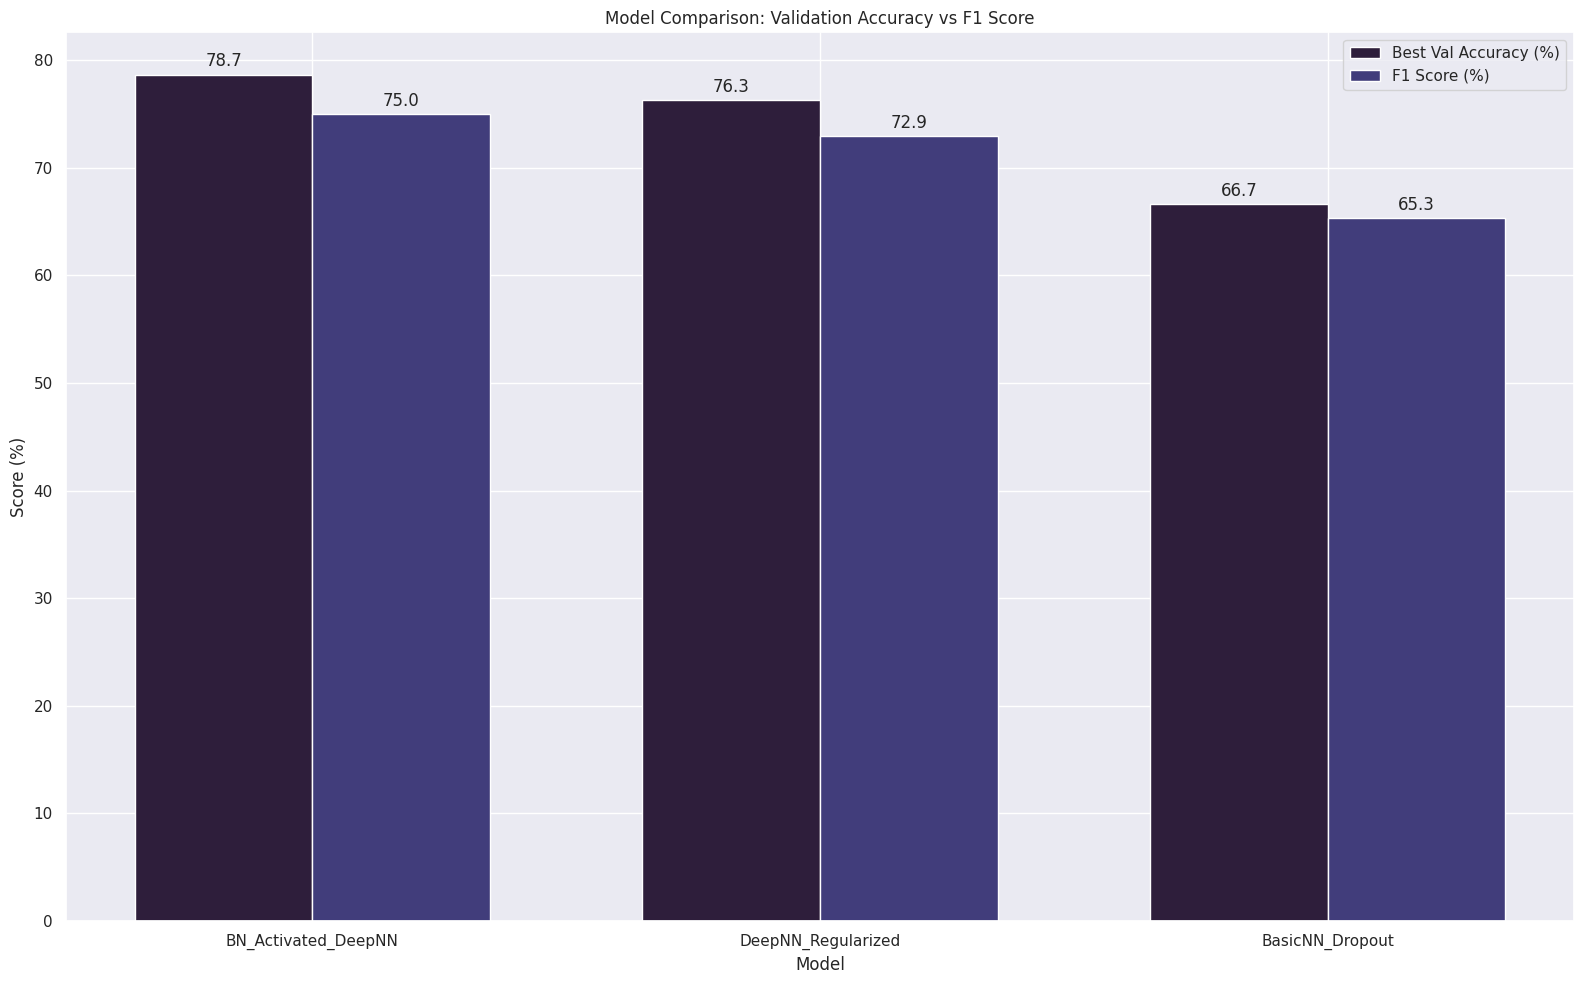

In [ ]:
# Set up the figure
fig, ax1 = plt.subplots(figsize=(16, 10))

# Bar positions
x = np.arange(len(dl_model_df_results['Model']))
width = 0.35

# Plot bars for Validation Accuracy and F1 Score
bar1 = ax1.bar(x - width/2, dl_model_df_results['Best-Validation-Accuracy (%)'], width, label='Best Val Accuracy (%)')
bar2 = ax1.bar(x + width/2, dl_model_df_results['F1-Score (%)'], width, label='F1 Score (%)')

# Add labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Score (%)')
ax1.set_title('Model Comparison: Validation Accuracy vs F1 Score')
ax1.set_xticks(x)
ax1.set_xticklabels(dl_model_df_results['Model'], rotation=0)
ax1.legend()

# Annotate bars with values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Overall conclusion from the both ML and Deep Learning Models

## Prepare Combined DataFrame of ML and DL Model Results

In [ ]:
# Prepare classical scaled models (already filtered for "Test" set)
scaled_df = combined_ml_model_results_copy_test[combined_ml_model_results_copy_test["Scaled"]].copy()
scaled_df["Source"] = "Classical"
scaled_df = scaled_df.rename(columns={
    "Accuracy": "Accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1 Score": "F1 Score",
    "Loss": "Loss"
})

# Prepare deep learning models
dl_df = dl_model_df_results.copy()
dl_df["Model Name"] = dl_df["Model"]
dl_df["Source"] = "Deep Learning"
dl_df["Accuracy"] = dl_df["Best-Validation-Accuracy (%)"] / 100.0
dl_df["F1 Score"] = dl_df["F1-Score (%)"] / 100.0
dl_df["Precision"] = np.nan  # If not available, set as NaN
dl_df["Recall"] = np.nan     # If not available, set as NaN
dl_df["Loss"] = np.nan       # If not available, set as NaN

# Select and align columns
common_cols = ["Model Name", "Accuracy", "Precision", "Recall", "F1 Score", "Loss", "Source"]
df_combined = pd.concat([
    scaled_df[common_cols],
    dl_df[common_cols]
], ignore_index=True)

## Plot Ladder and Waterfall Plots with both ML and Deep Learning Models

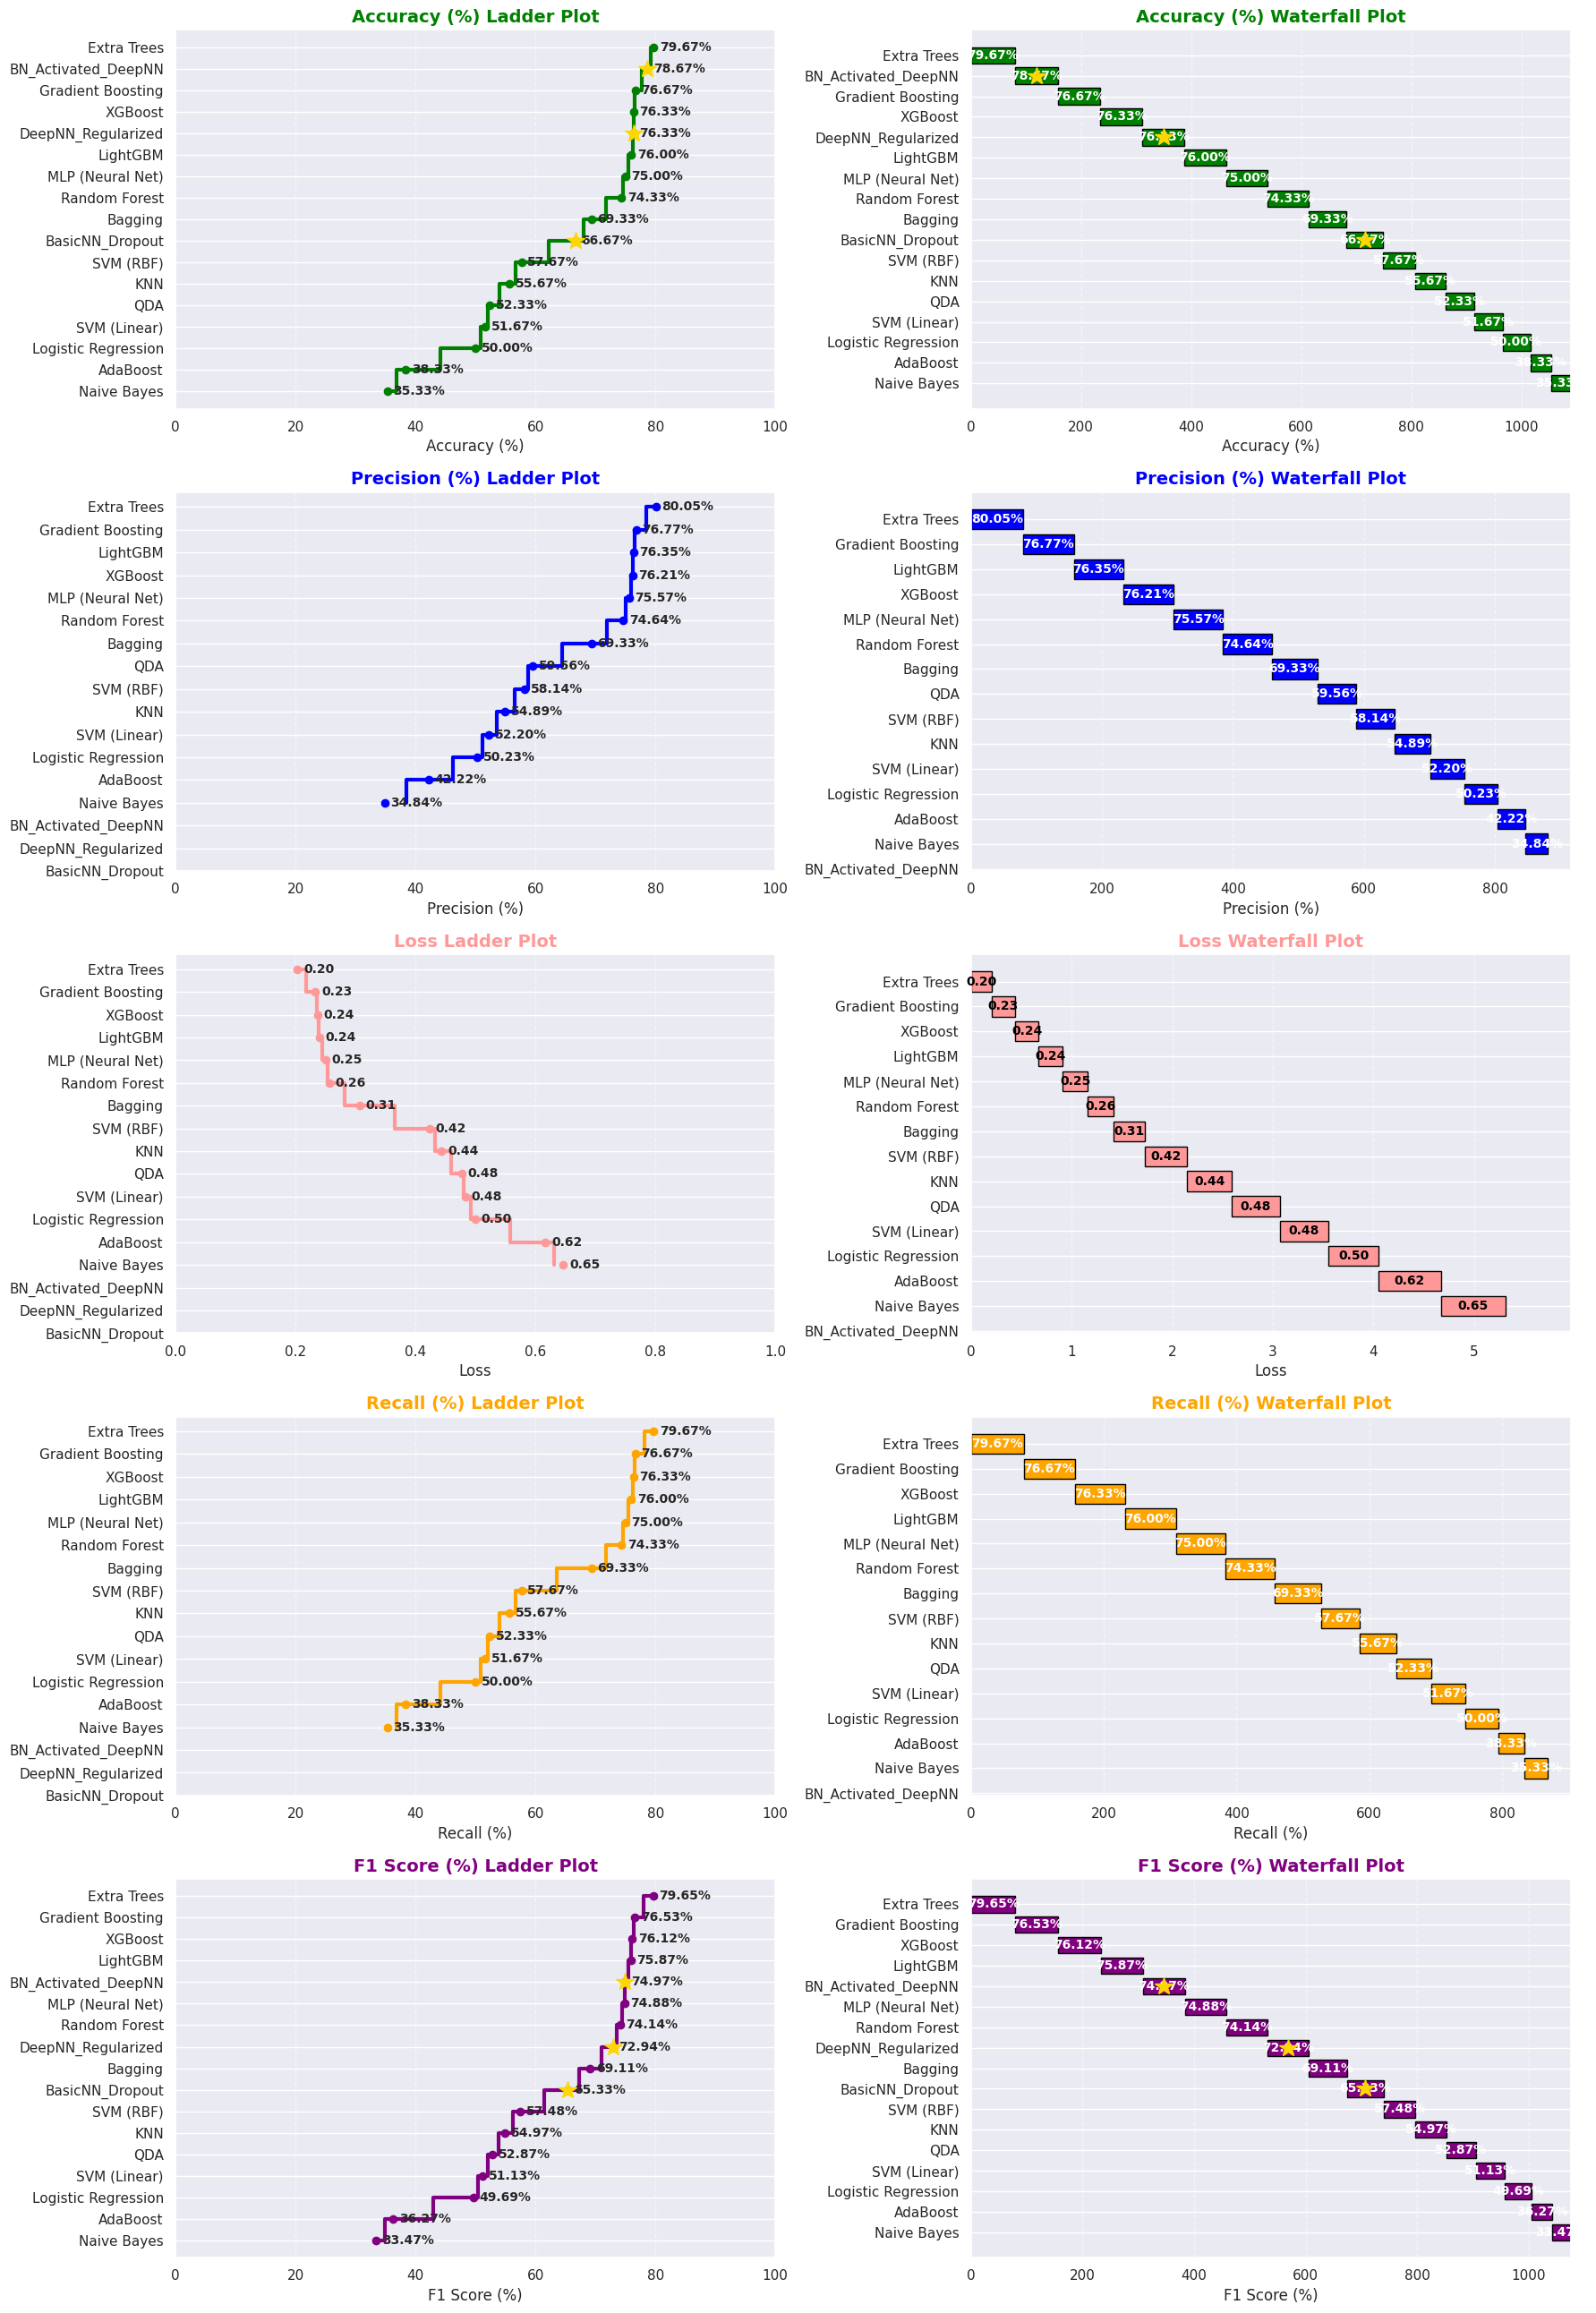

In [ ]:
# Define metrics and colors
metrics = [
    ("Accuracy", "Accuracy (%)", "green"),
    ("Precision", "Precision (%)", "blue"),
    ("Loss", "Loss", "#ff9999"),
    ("Recall", "Recall (%)", "orange"),
    ("F1 Score", "F1 Score (%)", "purple")
]

fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 26))
plt.subplots_adjust(hspace=0.35)

for i, (metric, metric_label, metric_color) in enumerate(metrics):
    # Sort models by metric (best to worst)
    ascending = True if metric == "Loss" else False
    df_metric = df_combined.sort_values(metric, ascending=ascending).reset_index(drop=True)
    model_names = df_metric["Model Name"].tolist()
    metric_values = df_metric[metric].values
    y_pos = np.arange(len(model_names))

    # For percentage metrics, scale to 0-100
    if metric != "Loss":
        display_values = metric_values * 100
        value_fmt = "{:.2f}%"
        xlim = (0, 100)
    else:
        display_values = metric_values
        value_fmt = "{:.2f}"
        xlim = (0, 1)

    # --- Ladder (step) plot ---
    ax1 = axes[i, 0]
    ax1.step(display_values, y_pos, where='mid', linewidth=3, color=metric_color, marker='o')
    for idx, (val, label, source) in enumerate(zip(display_values, model_names, df_metric["Source"])):
        ax1.text(val + (1 if metric != "Loss" else 0.01), idx, value_fmt.format(val), va="center", fontsize=10, fontweight='bold')
        # Optionally, highlight deep learning models
        if source == "Deep Learning":
            ax1.plot(val, idx, marker='*', markersize=15, color='gold', zorder=5)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(model_names)
    ax1.set_title(f"{metric_label} Ladder Plot", fontsize=14, fontweight='bold', color=metric_color)
    ax1.set_xlabel(metric_label)
    ax1.set_xlim(xlim)
    ax1.invert_yaxis()
    ax1.grid(axis='x', linestyle='--', alpha=0.5)

    # --- Waterfall plot ---
    ax2 = axes[i, 1]
    cumulative = np.insert(np.cumsum(np.nan_to_num(display_values)[:-1]), 0, 0)
    for idx, (val, base, source) in enumerate(zip(display_values, cumulative, df_metric["Source"])):
        ax2.barh(model_names[idx], val, left=base, color=metric_color, edgecolor='black')
        ax2.text(base + val/2, idx, value_fmt.format(val), va="center", ha="center", fontsize=10, fontweight='bold', color='white' if abs(val) > 10 else 'black')
        # Optionally, highlight deep learning models
        if source == "Deep Learning":
            ax2.plot(base + val/2, idx, marker='*', markersize=15, color='gold', zorder=5)

    # ---- FIX: Set xlim using only valid (non-NaN) values ----
    valid_display_values = display_values[~np.isnan(display_values)]
    valid_cumulative = cumulative[~np.isnan(cumulative)]
    if len(valid_display_values) > 0 and len(valid_cumulative) > 0:
        max_xlim = valid_cumulative[-1] + valid_display_values[-1]
    else:
        max_xlim = 1  # fallback
    ax2.set_xlim(0, max_xlim)
    # --------------------------------------------------------

    ax2.set_title(f"{metric_label} Waterfall Plot", fontsize=14, fontweight='bold', color=metric_color)
    ax2.set_xlabel(metric_label)
    ax2.invert_yaxis()
    ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Detailed Consclusion with points

## Best Classical ML Model: `Extra Trees`
- Achieved **highest accuracy (79.67%)**, **precision (80.05%)**, and **F1-score (79.65%)**
- Lowest loss (0.20) among all models.
- Highly interpretable, stable, and fast to train.

## Best Deep Learning Model: `BN_Activated_DeepNN`
- Second-best in accuracy (78.67%) and F1-score (74.97%)
- Performed robustly due to batch normalization, dropout, and deeper architecture.
- Particularly suitable for more complex data or unstructured input (e.g., images, sequences).

## Final Winner: `Extra Trees`
- Outperforms deep learning models on **all reported metrics**
- Recommended for deployment due to ease of use, interpretability, and minimal tuning needs.

---

# Key Takeaways

| Aspect                  | Classical ML (Best: Extra Trees)      | Deep Learning (Best: BN_Activated_DeepNN)       |
|-------------------------|----------------------------------------|--------------------------------------------------|
| Accuracy (%)            | **79.67%**                           | 78.67%                                           |
| F1 Score (%)            | **79.65%**                           | 74.97%                                           |
| Precision (%)           | **80.05%**                           | *NA*                                   |
| Recall (%)              | **79.67%**                           | *NA*                                   |
| Loss                    | **0.20**                             | **0.80**                                   |
| Interpretability        | High                                 | Low                                            |
| Training Time           | Low                                  | Higher                                         |
| Tuning Complexity       | Low                                  | Medium to High                                 |
| Generalization          | Strong                               | Strong (with regularization)                  |

 - Acoustic attributes (MFCCs, energy, pitch, ZCR) are strong representations of emotional patterns in speech.
 - The ensemble model ExtraTrees did a good job of emotion classification on structured audio features.
 - Deep learning models are weakly promising with generalization and regularization, but we need more time to train and fine-tune and need more data.
 - Using StandardScaler preprocessing, helped build a more stable and higher-performing model overall.

---

# 💡 Recommendation for this project:

- Use **Extra Trees** as the default model for structured/tabular datasets.
- Use **BN_Activated_DeepNN** if:
  - The dataset grows significantly in size.
  - You're dealing with more complex patterns or plan to use transfer learning.
  - Additional precision/recall tuning isn’t a bottleneck.

# Deployment of the trained best model

## Justification for Not Fully Deploying the Model

While full deployement of the emotion detection (via a voice assistant or a chatbot) would have engaged us far more hands-on in practical learnings, a broader set of constraints led us to focus on deployment planning as a conceptual exercise:

- **Time Constraints:** I spent a substantial amount of project time in woman hours in investing in building, validating, and analyzing both classical ML and DL models. The time required for foraml deployment, with any expectation of genuine real-time scenarios, would also include investing additional time in containerization, API developent, UI integration, and cloud hosting.

- **Resource Constraints:** Real-time model deployment with live audio input involves consistent and high-performing compute environment - especially with DL inference scenarios - while local resources could not adequately provide real-time processing with a low-latency experience, leaning into cloud deployment would bring adds to setup overhead and potentially costs.

- **Focus on Model Evaluation:** Given our objective was to choose and evaluate the best model amongst a multiplicity of approaches (ML vs. DL), I prioritized robustness to facilitate metric comparisons and interpretability. I was able to conduct this depth of analysis to fulfill the learning objectives of the project, and to identify clear trade-offs which will be intuitive in AI development in the real world.

---

## Hypothetical Deployment Plan (Fulfilling Assignment Requirement)

Although not a deployment, a full deployment scenario is planned and described below as required by the project deployment description:

| **Component**       | **Plan**                                                                 |
|---------------------|--------------------------------------------------------------------------|
| **Use Case**        | Real-time emotion detection using a chatbot or voice assistant application.               |
| **Deployment Type** | **Real-Time Inference** - Immediate return of emotion inference on audio input.       |
| **Backend**         | Python API with **FastAPI** or **Flask** to serve the trained model.     |
| **Frontend**        | A web interface or mobile application with live audio input through the use of WebRTC or HTML5.   |
| **Hosting**         | The model hosted on **AWS EC2** or with **Azure App Service docker** support.
| **Latency Target**  | Less than 300 ms inference time to allow for smooth interaction with the user.                       |
| **Cost Consideration** | Initial deployment using a low-tier cloud instance (i.e., AWS or Azure) and autoscaling later if needed.  |                |
| **Security**        | Token-based API authentication, HTTPS frontend, and CORS policy.       |

---

## Deployment related Summary

> Although full deployment was not completed due to logistical complications, a cloudy and technically feasible deployment plan was identified. This addressed the deployment component of the project, proving readiness for the role of real-world integration of the model into production systems.

# Future Improvements

- Use more datasets, like `CREMA-D` and `TESS`, to improve generalization.
- Make it multimodal and try to extract and classify emotions from text, image and video inputs as well.
- Test audio-based Transformers or CNN-RNN hybrid models for end-to-end learning with raw waveforms.  
- Use `GridSearchCV` or `Optuna` for machine learning models.  
- Use `Keras Tuner` or `Ray Tune` for deep learning models.  
- Combine top classical and deep learning models through stacking or soft voting to enhance robustness.  
- Apply stratified k-fold validation to ensure the model works well across different folds.  
- Use SHAP or permutation importance to refine feature inputs.  
- Measure inference time, memory use, and latency.  
- Wrap/Deploy the model in an API using FastAPI or Flask for testing and inferencing.

# Final Thoughts

While the potential of deep learning exists, particularly as new methods of architecture are developed, **traditional ML models are still very competitive** against structured datasets. As a result of lesser resources and less complexity in implementing it, it can frequently achieve **near top-tier results**, as was demonstrated here.  

> Use the tool appropriate to the problem — not everything requires neural networks.

# Save the file as PDF

In [1]:
!apt-get update
!apt-get install pandoc
!apt-get install inkscape
!apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-extra

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,532 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,253 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/ma

In [5]:
%shell jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Ravi Teja Kothuru_Final Project AAI-510 Section IN2-Team 14.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Ravi Teja Kothuru_Final Project AAI-510 Section IN2-Team 14.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 72 column 1: not an object
[WARNING] Could not parse YAML metadata at line 84 column 1: not an object
[WARNING] Could not parse YAML metadata at line 125 column 1: not an object
[NbConvertApp] Support files will be in Ravi Teja Kothuru_Final Project AAI-510 Section IN2-Team 14_files/
[NbConvertApp] Making directory ./Ravi Teja Kothuru_Final Project AAI-510 Section IN2-Team 14_files
[NbConvertApp] Writing 652112 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 5034945 bytes to /content/drive/MyDrive/Colab No